# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 26.09.2021

Мягкий дедлайн: 23:59MSK 11.10.2021

Жесткий дедлайн: 23:59MSK 14.10.2021

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [ ]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

%matplotlib inline

warnings.simplefilter('ignore')
sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_set = pd.read_csv('nyc-taxi-trip-duration/train.csv')
test_set = pd.read_csv('nyc-taxi-trip-duration/test.csv')
pd.set_option('display.max_rows', 1000)
train_set.sort_values(by='trip_duration', ascending=True).sample(1000)

id  vendor_id      pickup_datetime     dropoff_datetime  \
355027   id0614240          2  2016-01-15 09:44:32  2016-01-15 09:53:24   
214316   id2901275          1  2016-02-13 13:37:04  2016-02-13 13:42:54   
1401061  id0814268          2  2016-02-25 09:30:46  2016-02-25 09:41:07   
623936   id3814657          1  2016-05-25 08:07:23  2016-05-25 08:19:08   
1250931  id2490389          2  2016-05-12 22:41:33  2016-05-12 23:13:28   
404119   id0738596          2  2016-02-06 02:33:10  2016-02-06 02:46:36   
164795   id3351358          2  2016-01-30 14:36:21  2016-01-30 14:42:32   
275677   id1157483          2  2016-02-29 11:43:42  2016-02-29 11:47:34   
504403   id3640923          1  2016-04-11 19:16:13  2016-04-11 19:19:09   
1207639  id3177444          2  2016-05-18 17:49:29  2016-05-18 17:51:50   
1197837  id2527178          1  2016-01-07 21:58:48  2016-01-07 22:06:22   
1364882  id3177533          2  2016-03-20 06:29:20  2016-03-20 06:33:17   
312622   id1739658          1  2016-06-24 07:04:00  2016-06-24 07:06:49   
1221049  id1104500          2  2016-01-10 15:58:01  2016-01-10 16:16:39   
889507   id0731633          1  2016-04-10 19:22:41  2016-04-10 19:24:34   
847190   id2486553          1  2016-03-24 20:51:52  2016-03-24 21:12:48   
274086   id0009776          2  2016-06-26 02:14:22  2016-06-26 02:24:59   
83963    id3277548          2  2016-02-27 12:08:24  2016-02-27 12:11:37   
645811   id0860293          2  2016-05-06 21:01:22  2016-05-06 21:06:45   
498579   id3365996          1  2016-04-05 13:06:31  2016-04-05 13:51:35   
458467   id2212248          1  2016-06-16 17:16:17  2016-06-16 17:30:17   
276754   id1177995          1  2016-01-18 13:48:32  2016-01-18 13:55:41   
233557   id3545791          1  2016-03-21 13:55:27  2016-03-21 14:06:29   
593913   id3234812          1  2016-06-13 06:20:13  2016-06-13 06:23:58   
218041   id3952211          1  2016-02-15 20:05:04  2016-02-15 20:13:06   
528734   id1312760          1  2016-03-11 17:42:40  2016-03-11 17:52:02   
686991   id1844580          2  2016-06-26 02:17:05  2016-06-26 02:23:36   
250733   id2892792          2  2016-02-23 23:57:51  2016-02-24 00:17:45   
1406992  id0130382          2  2016-01-23 11:09:59  2016-01-23 11:13:57   
286757   id2490741          1  2016-04-09 11:20:51  2016-04-09 11:26:48   
1406128  id0530886          2  2016-03-08 06:55:48  2016-03-08 07:30:30   
244052   id3646759          1  2016-03-27 10:52:41  2016-03-27 10:59:51   
703468   id0412902          1  2016-04-14 20:32:14  2016-04-14 20:44:08   
405397   id0486547          2  2016-05-13 12:16:07  2016-05-13 12:30:23   
302076   id2951976          2  2016-05-28 21:23:51  2016-05-28 21:28:30   
575765   id2059245          2  2016-04-25 07:54:40  2016-04-25 08:06:20   
653939   id3495519          1  2016-06-01 18:56:38  2016-06-01 19:01:11   
98525    id0267477          2  2016-04-19 20:32:20  2016-04-19 20:37:38   
435882   id0113071          1  2016-01-05 12:42:52  2016-01-05 12:44:58   
733950   id1956586          2  2016-03-03 00:28:59  2016-03-03 00:29:31   
294188   id1379415          1  2016-02-15 14:43:26  2016-02-15 15:52:49   
1389794  id1788120          2  2016-03-29 11:36:36  2016-03-29 11:43:55   
718360   id1508311          2  2016-02-27 20:46:33  2016-02-27 20:57:33   
330012   id3565652          1  2016-06-29 01:59:50  2016-06-29 02:10:59   
309865   id0072312          2  2016-03-11 01:16:56  2016-03-11 01:25:42   
759052   id3042919          1  2016-05-01 01:57:21  2016-05-01 02:08:10   
333910   id3713672          1  2016-06-30 17:15:59  2016-06-30 17:34:53   
980271   id0700310          2  2016-06-03 15:04:08  2016-06-03 15:14:59   
1304014  id1285131          1  2016-04-03 07:02:16  2016-04-03 07:12:54   
345169   id3803655          1  2016-03-21 17:59:46  2016-03-21 18:14:31   
794948   id1077922          1  2016-06-29 21:54:45  2016-06-29 22:22:02   
681415   id2633756          1  2016-01-18 21:03:46  2016-01-18 21:10:19   
347660   id0907893          1  2016-06-01

In [ ]:
test_set.sample(5)

id  vendor_id      pickup_datetime  passenger_count  \
492900  id0840924          1  2016-02-11 06:08:44                1   
182576  id0180167          1  2016-05-07 22:01:52                1   
484122  id3323683          2  2016-02-13 12:02:34                1   
266804  id2150533          1  2016-04-14 11:37:33                1   
359569  id1598487          1  2016-03-19 02:49:25                4   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
492900        -73.789749        40.646992         -73.943169   
182576        -73.975082        40.762241         -73.991776   
484122        -73.967972        40.771118         -73.982361   
266804        -73.990875        40.734371         -74.009003   
359569        -74.006386        40.740566         -73.985580   

        dropoff_latitude store_and_fwd_flag  
492900         40.711056                  N  
182576         40.726410                  N  
484122         40.768330                  N  
266804         40.714775                  N  
359569         40.732498                  N

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#train_set = train_set.drop(columns=['dropoff_datetime'])
train_set1 = train_set
test_test1 = test_set
train_set1 = train_set1.astype({'pickup_datetime':'datetime64'})

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

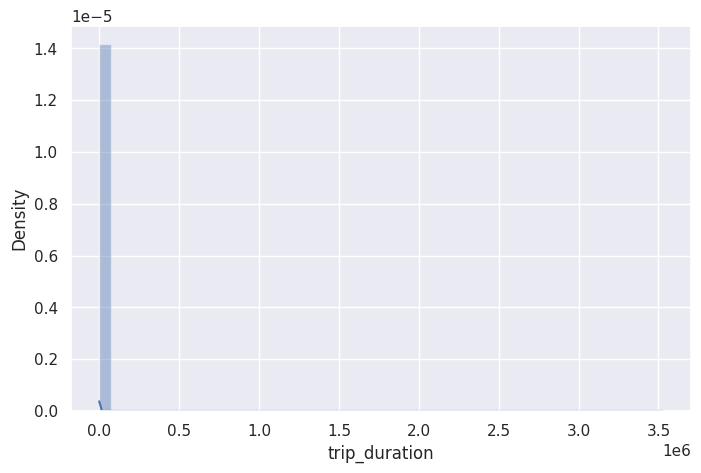

<Axes: >

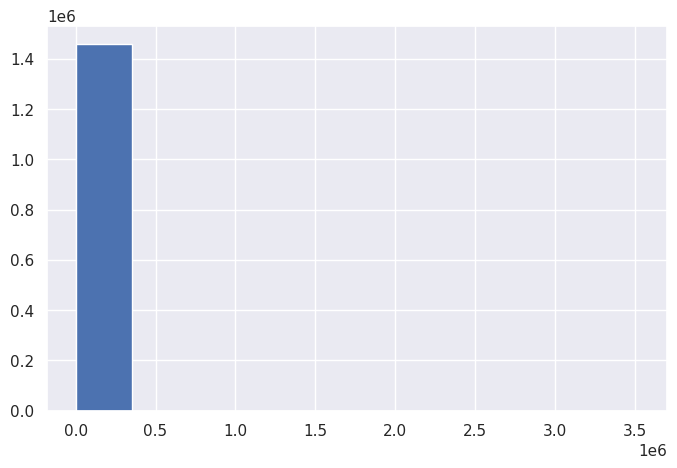

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y_train = train_set1['trip_duration']
sns.distplot(y_train)
plt.show()
y_train.hist()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE? Это связано с тем, что в подобном задаче важнее предсказать порядок целевой переменой, а не значение с точностью до секунд.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

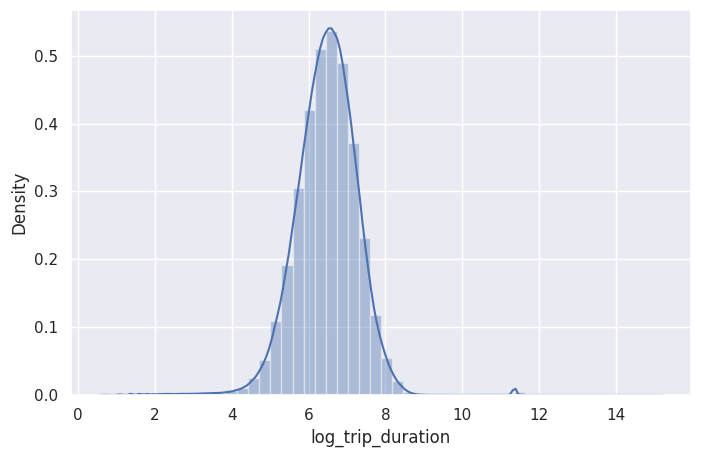

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_set2 = train_set1
train_set2['log_trip_duration'] = np.log1p(train_set2['trip_duration'])
train_set2 = train_set2.drop(columns=['trip_duration'])
y_train2 = train_set2['log_trip_duration']
sns.distplot(y_train2)
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [ ]:
import time

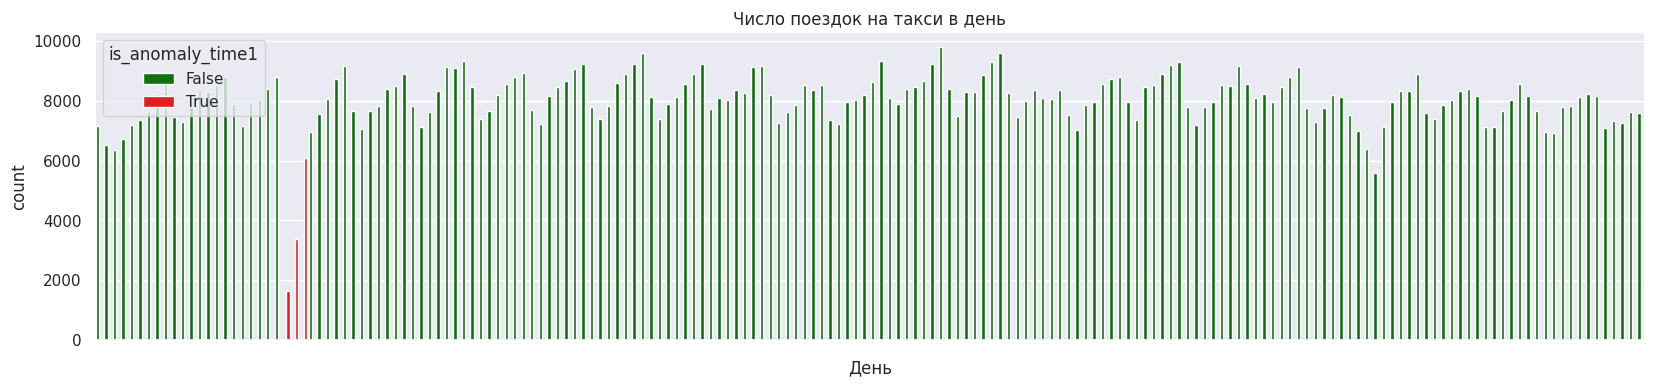

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(20, 4))
dates = pd.to_datetime(train_set2['pickup_datetime'])
train_set2['days'] = dates.dt.date
train_set2['days'] = train_set2["days"].apply(lambda x: x.__str__())
train_set2_sorted = train_set2.sort_values(by="days")
train_set2_sorted["is_anomaly_time1"] = train_set2_sorted['days'].apply(lambda x: x == "2016-01-23" or x == "2016-01-24" or
                                                                                  x == "2016-01-25")
train_set2_sorted["is_anomaly_time2"] = train_set2_sorted['days'].apply(lambda x: x == "2016-05-30")
train_set2_sorted["is_anomaly_time"] = train_set2_sorted["is_anomaly_time1"] | train_set2_sorted["is_anomaly_time2"]
dates_ = sns.countplot(x='days', hue="is_anomaly_time1", palette={False:"green", True:"red"}, data=train_set2_sorted);
plt.title("Число поездок на такси в день");
plt.xlabel("День");
dates_.set_xticklabels('');

In [ ]:
train_set2_sorted[train_set2_sorted['days'] == '2016-05-30']

id  vendor_id     pickup_datetime     dropoff_datetime  \
1033721  id1057108          2 2016-05-30 19:25:40  2016-05-30 19:27:59   
281008   id0530631          1 2016-05-30 22:37:51  2016-05-30 22:48:49   
465279   id1905930          2 2016-05-30 19:55:18  2016-05-30 20:00:11   
1147056  id2546073          1 2016-05-30 19:00:41  2016-05-30 19:06:48   
1443380  id0443699          1 2016-05-30 22:13:14  2016-05-30 22:24:26   
...            ...        ...                 ...                  ...   
1446028  id0402406          1 2016-05-30 20:09:02  2016-05-30 20:21:19   
55562    id3294776          2 2016-05-30 16:07:08  2016-05-30 16:42:43   
499220   id0103804          2 2016-05-30 12:11:40  2016-05-30 12:16:12   
486222   id3699427          2 2016-05-30 16:15:46  2016-05-30 16:31:47   
1107995  id3860567          1 2016-05-30 21:41:33  2016-05-30 21:45:27   

         passenger_count  pickup_longitude  pickup_latitude  \
1033721                1        -73.965927        40.759628   
281008                 2        -73.879311        40.725239   
465279                 1        -73.969429        40.797989   
1147056                1        -73.977242        40.755291   
1443380                1        -73.995155        40.749691   
...                  ...               ...              ...   
1446028                1        -73.966476        40.767509   
55562                  1        -73.789635        40.647270   
499220                 1        -74.008583        40.711544   
486222                 2        -73.996773        40.737541   
1107995                1        -73.985199        40.736198   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
1033721         -73.965424         40.753689                  N   
281008          -73.896179         40.746040                  N   
465279          -73.972778         40.785751                  N   
1147056         -73.958672         40.768147                  N   
1443380         -73.982307         40.776321                  N   
...                    ...               ...                ...   
1446028         -73.997276         40.738941                  N   
55562           -73.983818         40.721466                  N   
499220          -73.990692         40.699738                  N   
486222          -73.988228         40.720100                  N   
1107995         -73.991539         40.727161                  N   

         log_trip_duration        days  is_anomaly_time1  is_anomaly_time2  \
1033721           4.941642  2016-05-30             False              True   
281008            6.490724  2016-05-30             False              True   
465279            5.683580  2016-05-30             False              True   
1147056           5.908083  2016-05-30             False              True   
1443380           6.511745  2016-05-30             False              True   
...                    ...         ...               ...               ...   
1446028           6.603944  2016-05-30             False              True   
55562             7.666690  2016-05-30             False              True   
499220            5.609472  2016-05-30             False              True   
486222            6.869014  2016-05-30             False              True   
1107995           5.459586  2016-05-30             False              True   

         is_anomaly_time  
1033721             True  
281008              True  
465279              True  
1147056             True  
1443380             True  
...                  ...  
1446028             True  
55562               True  
499220              True  
486222              True  
1107995             True  

[5570 rows x 15 columns]

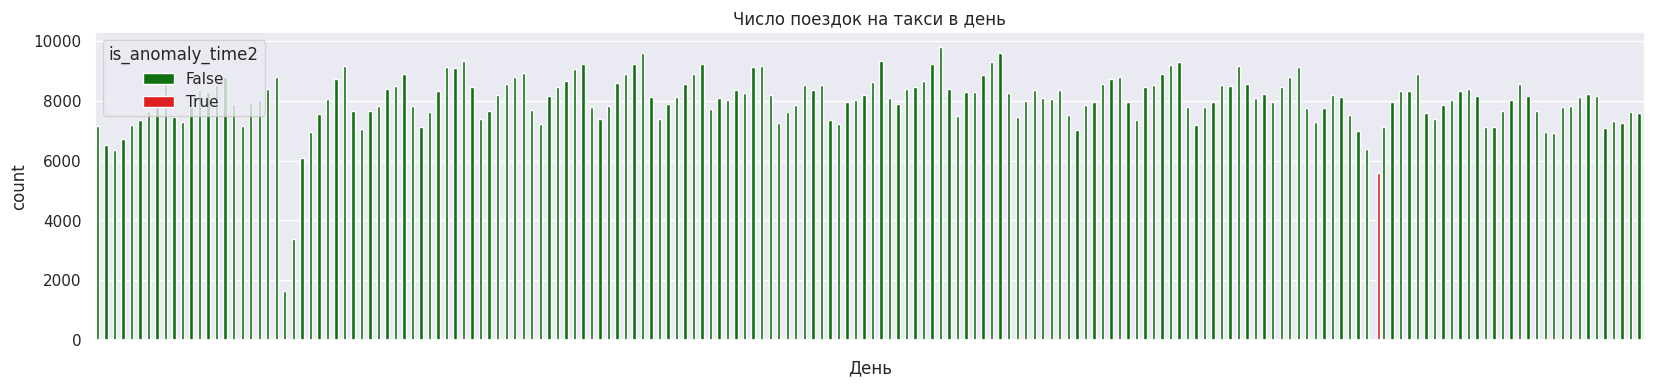

In [ ]:
plt.figure(figsize=(20, 4))
dates1_ = sns.countplot(x='days', hue="is_anomaly_time2", palette={False:"green", True:"red"}, data=train_set2_sorted);
plt.title("Число поездок на такси в день");
plt.xlabel("День");
dates1_.set_xticklabels('');

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
find_min_days = train_set2.groupby("days", as_index=False).agg({"id":"count"}).sort_values(by='id')
find_min_days
# В эти дни в Нью-Йорке проходила снежная буря, из-за чего было отменено движение в городе

days    id
22   2016-01-23  1648
23   2016-01-24  3383
150  2016-05-30  5570
24   2016-01-25  6084
2    2016-01-03  6353
149  2016-05-29  6372
1    2016-01-02  6512
3    2016-01-04  6725
171  2016-06-20  6910
25   2016-01-26  6941
170  2016-06-19  6962
148  2016-05-28  7004
115  2016-04-25  7028
31   2016-02-01  7064
177  2016-06-26  7084
38   2016-02-08  7110
163  2016-06-12  7112
164  2016-06-13  7114
151  2016-05-31  7131
17   2016-01-18  7146
0    2016-01-01  7162
129  2016-05-09  7174
4    2016-01-05  7204
52   2016-02-22  7209
87   2016-03-28  7233
80   2016-03-21  7248
179  2016-06-28  7253
10   2016-01-11  7276
143  2016-05-23  7300
178  2016-06-27  7311
122  2016-05-02  7344
86   2016-03-27  7364
5    2016-01-06  7365
45   2016-02-15  7373
66   2016-03-07  7395
157  2016-06-06  7399
59   2016-02-29  7402
9    2016-01-10  7454
108  2016-04-18  7459
101  2016-04-11  7485
114  2016-04-24  7529
147  2016-05-27  7530
26   2016-01-27  7571
181  2016-06-30  7588
156  2016-06-05  7589
39   2016-02-09  7620
81   2016-03-22  7622
180  2016-06-29  7623
46   2016-02-16  7646
6    2016-01-07  7649
165  2016-06-14  7654
169  2016-06-18  7662
32   2016-02-02  7668
30   2016-01-31  7670
51   2016-02-21  7683
72   2016-03-13  7738
142  2016-05-22  7745
144  2016-05-24  7762
58   2016-02-28  7777
172  2016-06-21  7782
130  2016-05-10  7789
11   2016-01-12  7794
128  2016-05-08  7801
173  2016-06-22  7811
37   2016-02-07  7821
33   2016-02-03  7828
60   2016-03-01  7839
158  2016-06-07  7852
82   2016-03-23  7852
116  2016-04-26  7858
67   2016-03-08  7879
16   2016-01-17  7891
94   2016-04-04  7891
18   2016-01-19  7934
131  2016-05-11  7941
152  2016-06-01  7943
88   2016-03-29  7943
117  2016-04-27  7949
121  2016-05-01  7964
138  2016-05-18  7971
109  2016-04-19  7990
159  2016-06-08  8014
19   2016-01-20  8018
166  2016-06-15  8024
89   2016-03-30  8031
74   2016-03-15  8032
112  2016-04-22  8062
27   2016-01-28  8066
136  2016-05-16  8077
93   2016-04-03  8084
73   2016-03-14  8091
111  2016-04-21  8091
146  2016-05-26  8121
174  2016-06-23  8126
68   2016-03-09  8127
65   2016-03-06  8138
168  2016-06-17  8146
176  2016-06-25  8148
162  2016-06-11  8166
53   2016-02-23  8172
47   2016-02-17  8181
90   2016-03-31  8187
145  2016-05-25  8195
79   2016-03-20  8199
7    2016-01-08  8229
175  2016-06-24  8233
137  2016-05-17  8237
107  2016-04-17  8254
76   2016-03-17  8259
13   2016-01-14  8277
103  2016-04-13  8296
102  2016-04-12  8301
40   2016-02-10  8311
153  2016-06-02  8325
154  2016-06-03  8335
160  2016-06-09  8339
110  2016-04-20  8341
113  2016-04-23  8352
84   2016-03-25  8353
12   2016-01-13  8360
75   2016-03-16  8361
20   2016-01-21  8375
161  2016-06-10  8377
34   2016-02-04  8377
100  2016-04-10  8379
95   2016-04-05  8389
54   2016-02-24  8442
139  2016-05-19  8455
123  2016-05-03  8457
96   2016-04-06  8468
44   2016-02-14  8473
133  2016-05-13  8476
35   2016-02-05  8501
132  2016-05-12  8524
83   2016-03-24  8527
85   2016-03-26  8535
124  2016-05-04  8535
14   2016-01-15  8539
167  2016-06-16  8544
135  2016-05-15  8547
69   2016-03-10  8557
118  2016-04-28  8558
48   2016-02-18  8572
61   2016-03-02  8578
8    2016-01-09  8578
91   2016-04-01  8640
55   2016-02-25  8642
97   2016-04-07  8669
119  2016-04-29  8732
28   2016-01-29  8735
120  2016-04-30  8780
49   2016-02-19  8781
15   2016-01-16  8797
21   2016-01-22  8805
140  2016-05-20  8808
104  2016-04-14  8846
70   2016-03-11  8880
62   2016-03-03  8888
155  2016-06-04  8890
125  2016-05-05  8896
36   2016-02-06  8904
50   2016-02-20  8922
56   2016-02-26  9056
42   2016-02-12  9108
77   2016-03-18  9115
41   2016-02-11  9116
141  2016-05-21  9127
78   2016-03-19  9143
134  2016-05-14  9147
29   2016-01-30  9166
126  2016-05-06  9202
98   2016-04-08  9215
57   2016-02-27  9232
63   2016-03-04  9237
71   2016-03-12  9241
105  2016-04-15  9276
127  2016-05-07  9285
43   2016-02-13  9309
92   2016-04-02  9325
64   2016-03-05  9597
106  2016-04-16  9602
99   20

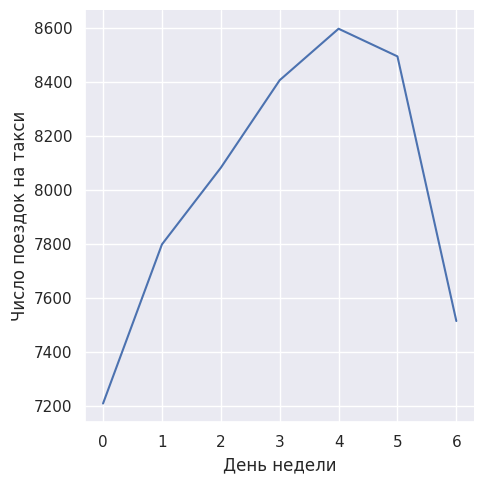

In [ ]:
train_set3 = train_set2_sorted
train_set3["week_day"] = train_set3["pickup_datetime"].dt.day_of_week
train_set3["month"] = train_set3["pickup_datetime"].dt.month
train_set3["hour"] = train_set3["pickup_datetime"].dt.hour
train_set3["day_number"] = train_set3["pickup_datetime"].dt.day_of_year
find_min_days["week_day"] = pd.to_datetime(find_min_days["days"]).dt.day_of_week
find_min_days["hour"] = pd.to_datetime(find_min_days["days"]).dt.hour
trip_distribution_by_week_day = find_min_days.groupby("week_day", as_index=False).agg({"id":"mean"})
trip_distribution_by_week_day
sns.relplot(x='week_day', kind='line', y="id", data=trip_distribution_by_week_day);
plt.ylabel("Число поездок на такси")
plt.xlabel("День недели");

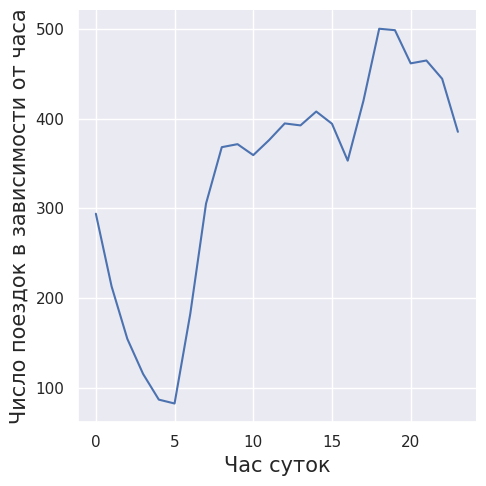

In [ ]:
train_set3
trip_distribution_by_hour = train_set3.groupby(["hour", "days"], as_index=False).agg({"id":"count"})
trip_mean_distribution_by_hour = trip_distribution_by_hour.groupby("hour", as_index=False).agg({"id":"mean"})
sns.relplot(x='hour', y='id', kind='line', data=trip_mean_distribution_by_hour);
plt.xlabel("Час суток", fontsize=15);
plt.ylabel("Число поездок в зависимости от часа", fontsize=15);

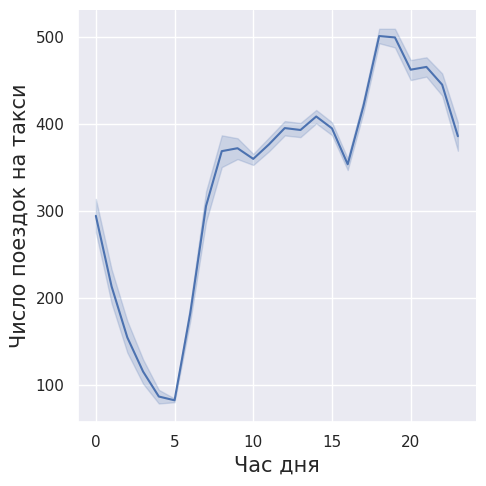

In [ ]:
sns.relplot(x='hour', kind='line', y="id", data=trip_distribution_by_hour);
plt.ylabel("Число поездок на такси", fontsize=15)
plt.xlabel("Час дня", fontsize=15);

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

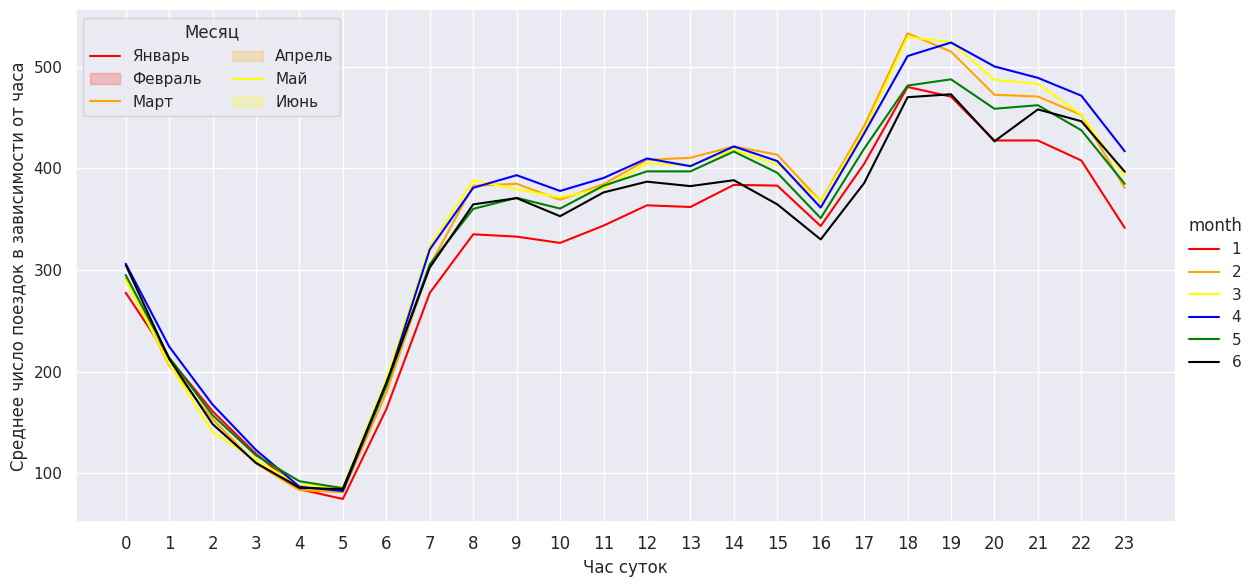

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plot1 = train_set3.groupby(["hour", "month", "days"], as_index=False).agg({"id":"count"})
mean_trip_count_by_hour = plot1.groupby(["hour", "month"], as_index=False).agg({"id":"mean"})
mean_trip_count_by_hour
month_colours = colours = {1:"red", 2:"orange", 3:"yellow", 4:"blue", 5:"green", 6:"black"}
sns.relplot(x="hour", y="id", hue="month", kind="line", palette=month_colours, data=mean_trip_count_by_hour, height=6, aspect=2)
plt.ylabel("Среднее число поездок в зависимости от часа")
plt.xlabel("Час суток");
plt.xticks(np.arange(24), fontsize=12)
plt.legend(title="Месяц", labels=["Январь", "Февраль", "Март", "Апрель", "Май", "Июнь"], ncol=2)

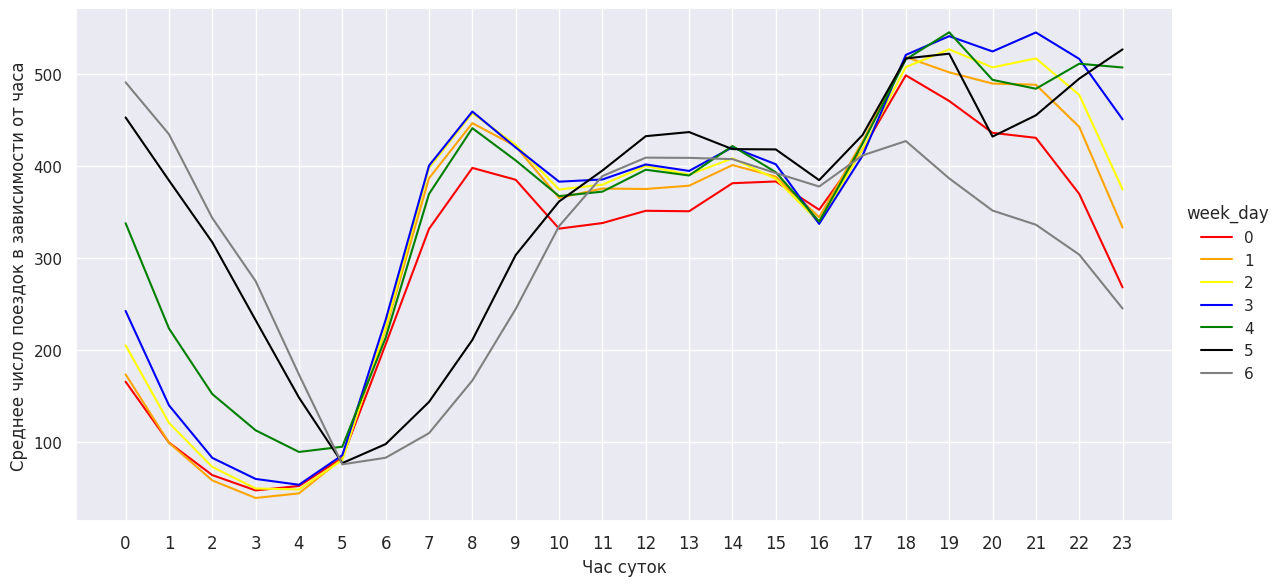

In [ ]:
plot2 = train_set3.groupby(["hour", "week_day", "days"], as_index=False).agg({"id":"count"})
mean_trip_count_by_hour2 = plot2.groupby(["hour", "week_day"], as_index=False).agg({"id":"mean"})
mean_trip_count_by_hour2
colours = {0:"red", 1:"orange", 2:"yellow", 3:"blue", 4:"green", 5:"black", 6:"grey"}
sns.relplot(x="hour", y="id", hue="week_day", kind="line", data=mean_trip_count_by_hour2, palette=colours, height=6, aspect=2)
plt.ylabel("Среднее число поездок в зависимости от часа")
plt.xticks(np.arange(24), fontsize=12)
plt.xlabel("Час суток");

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?
- Среднее число поездок слабо меняется в зависимости от месяца. Пик поезок приходится на час пик(8-10 часов и 18-20 часов).
- Распределение среднего числа поездок в выходные отличается от распределения в будние: это связано с работой людей в будни и отдыхом в выходные. Число поездок в выходные увеличивается более плавно и имеет меньшие максимумы по сравнению с рабочими днями. Также в выходные выше среднее число поездок в ночное время.
- В марте среднее число поездок в зависимости от часа выше, чем в другие месяцы
- В январе среднее число поездок в зависимости от часа ниже, чем в другие месяцы

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

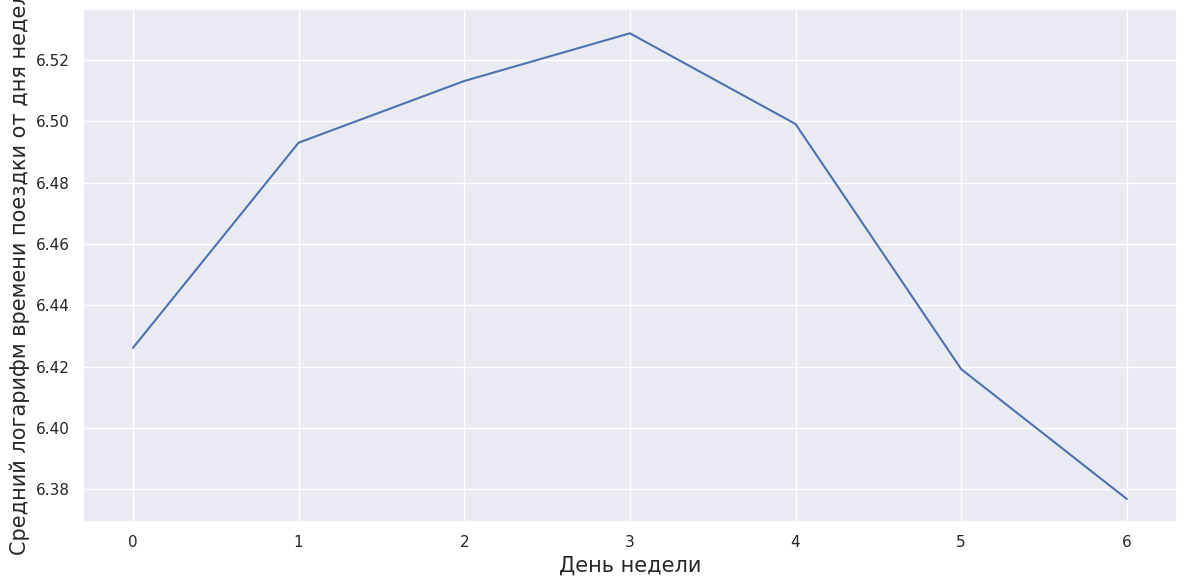

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_set3, test_size=0.3)
mean_log_trip_duration_week_day = train.groupby("week_day", as_index=False).agg({"log_trip_duration":"mean"})
sns.relplot(x="week_day", y="log_trip_duration", kind="line", data=mean_log_trip_duration_week_day, height=6, aspect=2);
plt.xlabel("День недели", fontsize=15);
plt.ylabel("Средний логарифм времени поездки от дня недели", fontsize=15);

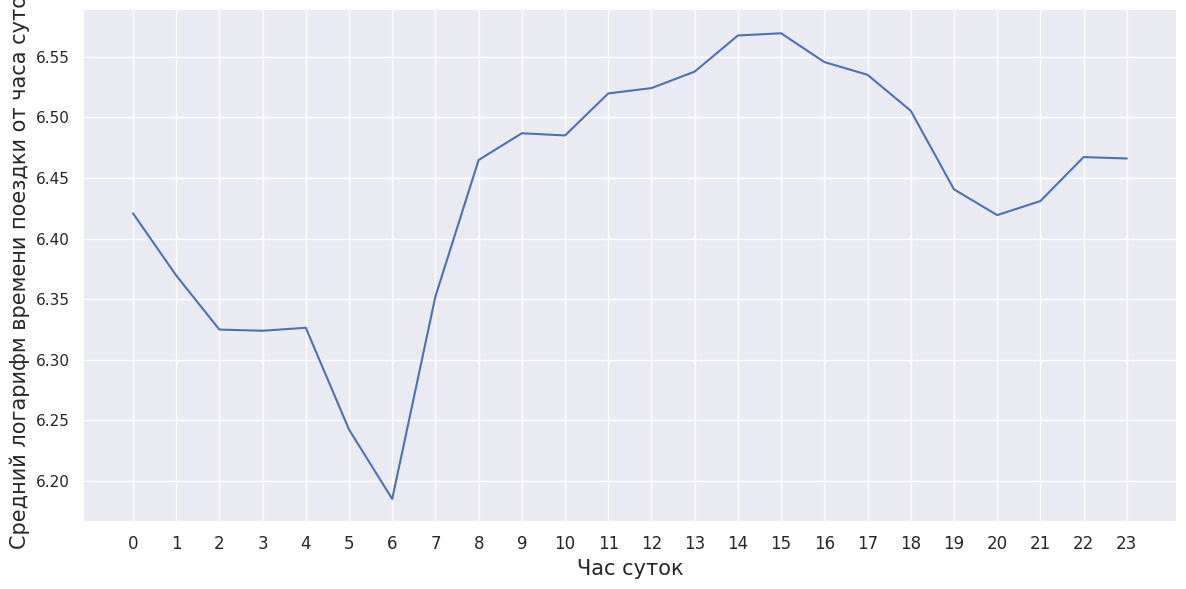

In [ ]:
mean_log_trip_duration_hour = train.groupby("hour", as_index=False).agg({"log_trip_duration":"mean"})
sns.relplot(x="hour", y="log_trip_duration", data=mean_log_trip_duration_hour, kind="line", height=6, aspect=2);
plt.xlabel("Час суток", fontsize=15);
plt.xticks(np.arange(24), fontsize=12)
plt.ylabel("Средний логарифм времени поездки от часа суток", fontsize=15);

In [ ]:
train

id  vendor_id     pickup_datetime     dropoff_datetime  \
400828   id0816973          2 2016-03-20 05:07:40  2016-03-20 05:31:31   
579180   id0180371          2 2016-02-28 03:32:21  2016-02-28 03:40:00   
639327   id3056393          1 2016-04-25 14:27:48  2016-04-25 14:33:22   
764490   id3702742          2 2016-03-29 14:05:45  2016-03-29 14:22:07   
666135   id1174909          1 2016-01-21 12:47:54  2016-01-21 12:50:53   
...            ...        ...                 ...                  ...   
292916   id2558784          2 2016-06-10 07:39:49  2016-06-10 07:57:10   
1066026  id0193087          2 2016-03-04 16:18:16  2016-03-04 16:40:41   
732816   id2617032          2 2016-03-24 09:26:24  2016-03-24 09:31:24   
1114142  id3043318          2 2016-05-06 00:57:03  2016-05-06 01:09:57   
1083942  id3038830          2 2016-03-09 06:40:26  2016-03-09 06:45:45   

         passenger_count  pickup_longitude  pickup_latitude  \
400828                 5        -73.988380        40.749142   
579180                 2        -74.004013        40.741974   
639327                 1        -73.997826        40.741142   
764490                 1        -73.963730        40.774349   
666135                 1        -73.963448        40.757465   
...                  ...               ...              ...   
292916                 1        -73.954338        40.784134   
1066026                1        -73.957581        40.785450   
732816                 2        -73.991081        40.733082   
1114142                1        -73.977562        40.784389   
1083942                1        -73.987480        40.738571   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
400828          -73.942543         40.826950                  N   
579180          -74.009628         40.720165                  N   
639327          -74.003960         40.731659                  N   
764490          -73.943108         40.777321                  N   
666135          -73.964661         40.755516                  N   
...                    ...               ...                ...   
292916          -73.960594         40.772537                  N   
1066026         -73.970284         40.760159                  N   
732816          -73.987457         40.725281                  N   
1114142         -73.990784         40.751270                  N   
1083942         -73.973808         40.757992                  N   

         log_trip_duration        days  is_anomaly_time1  is_anomaly_time2  \
400828            7.266827  2016-03-20             False             False   
579180            6.131226  2016-02-28             False             False   
639327            5.814131  2016-04-25             False             False   
764490            6.890609  2016-03-29             False             False   
666135            5.192957  2016-01-21             False             False   
...                    ...         ...               ...               ...   
292916            6.948897  2016-06-10             False             False   
1066026           7.204893  2016-03-04             False             False   
732816            5.707110  2016-03-24             False             False   
1114142           6.652863  2016-05-06             False             False   
1083942           5.768321  2016-03-09             False             False   

         is_anomaly_time  week_day  month  hour  day_number  
400828             False         6      3     5          80  
579180             False         6      2     3          59  
639327             False         0      4    14         116  
764490             False         1      3    14          89  
666135             False         3      1    12          21  
...                  ...       ...    ...   ...         ...  
292916             False         4      6     7         162  
1066026            False         4      3    16          64  
732816             False         3      3     9          84  
1114142 

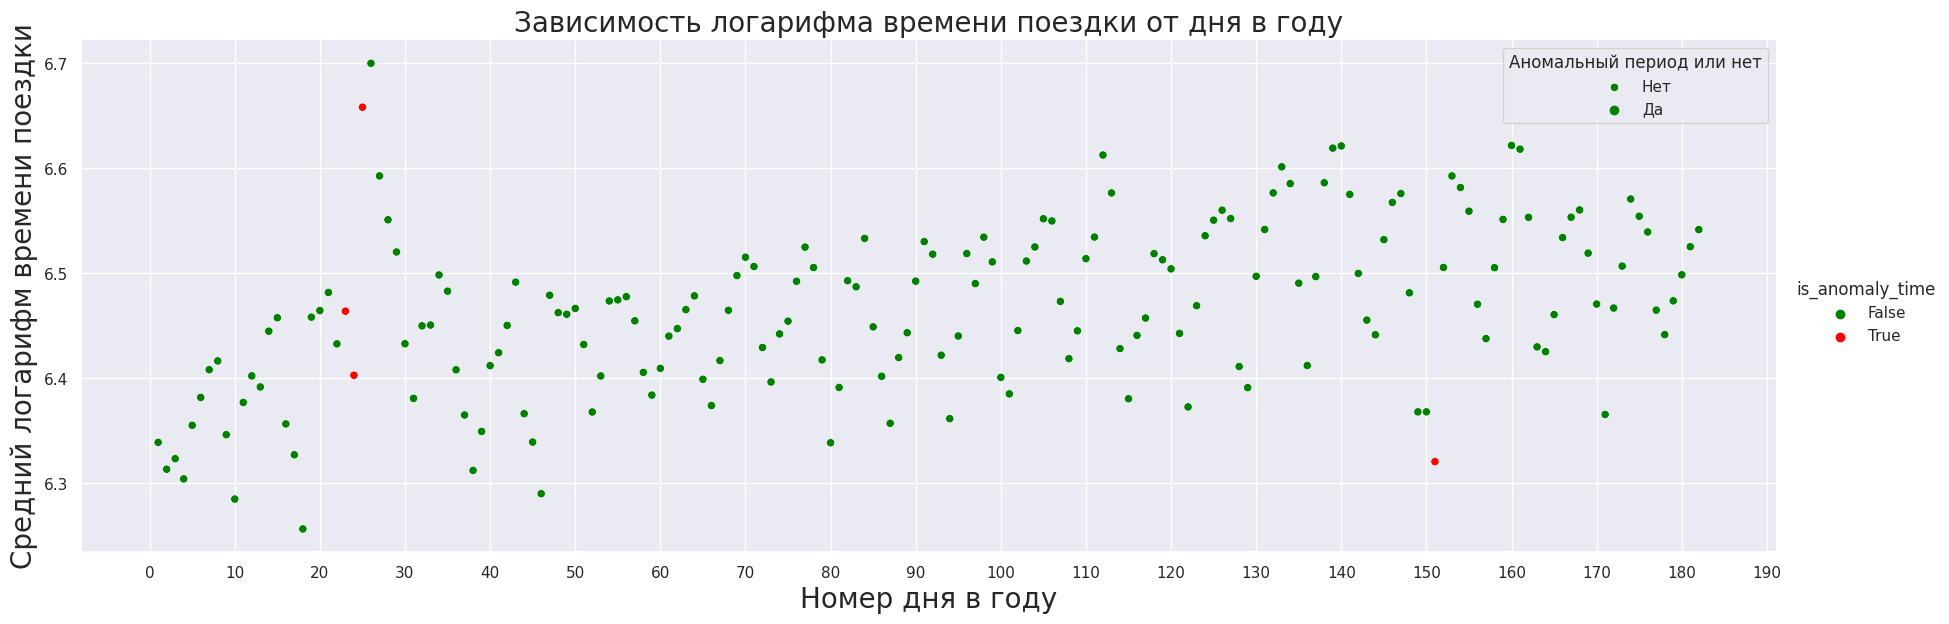

In [ ]:
train.dtypes
pd.set_option('display.max_rows', 1000)
#train["is_anomaly_year_day"] = train.apply(lambda x: True if pd.to_datetime("2016-01-23").dt.day_of_year == x[15] else False, axis=0)
mean_log_trip_duration_year_day = train.groupby("day_number", as_index=False).agg({"log_trip_duration":"mean"})
#find_anomalies = train.query("train.is_anomaly_time == True")
anomalies = train[["day_number", "is_anomaly_time"]].drop_duplicates(subset='day_number', keep='last')
anomalies_dict = {key:val for key, val in zip(anomalies.day_number, anomalies.is_anomaly_time)}
anomalies_dict
mean_log_trip_duration_year_day["is_anomaly_time"] = mean_log_trip_duration_year_day["day_number"].apply(lambda x: anomalies_dict[x])
sns.relplot(x="day_number", y="log_trip_duration", hue="is_anomaly_time", palette={False:"green", True:"red"}, data=mean_log_trip_duration_year_day, kind="scatter", height=6, aspect=3);
plt.xlabel("Номер дня в году", fontsize=20);
plt.title("Зависимость логарифма времени поездки от дня в году", fontsize=20);
plt.ylabel("Средний логарифм времени поездки", fontsize=20);
plt.legend(title="Аномальный период или нет", labels=["Нет", "Да"]);
plt.locator_params(axis='x', nbins= 32)

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

-Да похожи. Это происходит потому, что число поездок в день отражает загруженность дорог, соотвенственно из-за большей загруженности выше и логарифм поездки из-за пробок и активного движения в городе.
-Интересно то, что для двух дней первого средний логарифм времени поездки чуть ниже среднего времени поездки, а для третьего почти достигает максимума. Для второго аномального периода длительность была низкая. Скорее всего 2016-01-25 продолжительность поездки была довольно высокой из-за снега на дорогах.
-На графике наблюдается тренд скачкообразного измения длительности в зависимости от дня недели: пиг достигается к середине недели и спадает с выходным,точно такие же наблюдения были видны в графике зависимости числа поездок от дня недели.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?
Как категориальные имеет смысл рассматривать день недели, час дня, месяц и является ли период аномальным. Номер дня в году следует отнести к численным признакам.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [ ]:
train

id  vendor_id     pickup_datetime     dropoff_datetime  \
400828   id0816973          2 2016-03-20 05:07:40  2016-03-20 05:31:31   
579180   id0180371          2 2016-02-28 03:32:21  2016-02-28 03:40:00   
639327   id3056393          1 2016-04-25 14:27:48  2016-04-25 14:33:22   
764490   id3702742          2 2016-03-29 14:05:45  2016-03-29 14:22:07   
666135   id1174909          1 2016-01-21 12:47:54  2016-01-21 12:50:53   
...            ...        ...                 ...                  ...   
292916   id2558784          2 2016-06-10 07:39:49  2016-06-10 07:57:10   
1066026  id0193087          2 2016-03-04 16:18:16  2016-03-04 16:40:41   
732816   id2617032          2 2016-03-24 09:26:24  2016-03-24 09:31:24   
1114142  id3043318          2 2016-05-06 00:57:03  2016-05-06 01:09:57   
1083942  id3038830          2 2016-03-09 06:40:26  2016-03-09 06:45:45   

         passenger_count  pickup_longitude  pickup_latitude  \
400828                 5        -73.988380        40.749142   
579180                 2        -74.004013        40.741974   
639327                 1        -73.997826        40.741142   
764490                 1        -73.963730        40.774349   
666135                 1        -73.963448        40.757465   
...                  ...               ...              ...   
292916                 1        -73.954338        40.784134   
1066026                1        -73.957581        40.785450   
732816                 2        -73.991081        40.733082   
1114142                1        -73.977562        40.784389   
1083942                1        -73.987480        40.738571   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
400828          -73.942543         40.826950                  N   
579180          -74.009628         40.720165                  N   
639327          -74.003960         40.731659                  N   
764490          -73.943108         40.777321                  N   
666135          -73.964661         40.755516                  N   
...                    ...               ...                ...   
292916          -73.960594         40.772537                  N   
1066026         -73.970284         40.760159                  N   
732816          -73.987457         40.725281                  N   
1114142         -73.990784         40.751270                  N   
1083942         -73.973808         40.757992                  N   

         log_trip_duration        days  is_anomaly_time1  is_anomaly_time2  \
400828            7.266827  2016-03-20             False             False   
579180            6.131226  2016-02-28             False             False   
639327            5.814131  2016-04-25             False             False   
764490            6.890609  2016-03-29             False             False   
666135            5.192957  2016-01-21             False             False   
...                    ...         ...               ...               ...   
292916            6.948897  2016-06-10             False             False   
1066026           7.204893  2016-03-04             False             False   
732816            5.707110  2016-03-24             False             False   
1114142           6.652863  2016-05-06             False             False   
1083942           5.768321  2016-03-09             False             False   

         is_anomaly_time  week_day  month  hour  day_number  
400828             False         6      3     5          80  
579180             False         6      2     3          59  
639327             False         0      4    14         116  
764490             False         1      3    14          89  
666135             False         3      1    12          21  
...                  ...       ...    ...   ...         ...  
292916             False         4      6     7         162  
1066026            False         4      3    16          64  
732816             False         3      3     9          84  
1114142 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
model = LinearRegression()
Y_train = train["log_trip_duration"]
categorical_features = ["month", "week_day", "hour", "is_anomaly_time1", "is_anomaly_time2"]
numeric_features = ["day_number"]
scaler = StandardScaler()
incoder = OneHotEncoder(sparse=False)
X_scaled = scaler.fit_transform(train[numeric_features])
X_test_scaled = scaler.transform(test[numeric_features])
X_categorical = incoder.fit_transform(train[categorical_features])
x_cat_test = incoder.transform(test[categorical_features])
X_train = np.concatenate([X_scaled, X_categorical], axis=1)
x_test = np.concatenate([X_test_scaled, x_cat_test], axis=1)
model.fit(X_train, Y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(x_test)
y_test = test["log_trip_duration"]
print("mse train result: ", mean_squared_error(Y_train, y_pred_train, squared=False))
print("mse test result: ", mean_squared_error(y_test, y_pred_test, squared=False))

mse train result:  0.7886646990578591
mse test result:  0.7886938128828176


Протестируем собственную реализацию LinearRegression

In [ ]:
import numpy as np

class MyLinearRegression:
    def __init__(self, alpha=1.0, tolerance=0.0001, max_iter=200000, lr=0.05, reg=None):
        self._alpha = alpha
        self._tolerance = tolerance
        self._lr = lr
        self._reg = reg
        self._max_iter = max_iter

    def fit(self, X, y):
        y = np.reshape(np.array(y), (len(y), 1))
        feature_count = X.shape[1]
        feature_matrix = np.zeros((X.shape[0], feature_count + 1))
        feature_matrix[:, :feature_count] = X
        feature_matrix[:, feature_count] = 1
        self.weights = np.random.randn(feature_count + 1, 1)
        prev_weights = None
        updated_weights = self.weights
        iteration = 0
        while iteration < self._max_iter and (prev_weights is None or np.sum((prev_weights - updated_weights) ** 2) >= self._tolerance):
            prev_weights = updated_weights
            basic_grad = 2 * feature_matrix.T @ (feature_matrix @ prev_weights - y) / X.shape[0]
            l2_grad = 0
            if self._reg == "l2":
              l2_grad = 2 * prev_weights
            updated_weights = prev_weights - self._lr * (basic_grad + l2_grad)

            self.weights = updated_weights

    def predict(self, X):
        feature_count = X.shape[1]
        feature_matrix = np.zeros((X.shape[0], feature_count + 1))
        feature_matrix[:, :feature_count] = X
        feature_matrix[:, feature_count] = 1
        return feature_matrix @ self.weights

In [ ]:
model = MyLinearRegression()
model.fit(X_train, Y_train)
y_pred_train = model.predict(X_train)
print("pred: ", y_pred_train)
y_pred_test = model.predict(x_test)
y_test = test["log_trip_duration"]
print("mse train result: ", mean_squared_error(Y_train, y_pred_train, squared=False))
print("mse test result: ", mean_squared_error(y_test, y_pred_test, squared=False))

pred:  [[6.69363903]
 [5.44921267]
 [6.25647873]
 ...
 [6.74131219]
 [6.05248152]
 [6.9119809 ]]
mse train result:  0.9328506688888546
mse test result:  0.9324580773207692


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            popup=str(row["special_point_begin"]) + " " + str(row["special_point_end"]) + " " + str(row[latitude_column]) +
                " " + str(row[longitude_column]),
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

**Вопрос**: Какие две точки выделяются на карте? Выделяются две точки около Newark Liberty Airport.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [ ]:
train

id  vendor_id     pickup_datetime     dropoff_datetime  \
400828   id0816973          2 2016-03-20 05:07:40  2016-03-20 05:31:31   
579180   id0180371          2 2016-02-28 03:32:21  2016-02-28 03:40:00   
639327   id3056393          1 2016-04-25 14:27:48  2016-04-25 14:33:22   
764490   id3702742          2 2016-03-29 14:05:45  2016-03-29 14:22:07   
666135   id1174909          1 2016-01-21 12:47:54  2016-01-21 12:50:53   
...            ...        ...                 ...                  ...   
292916   id2558784          2 2016-06-10 07:39:49  2016-06-10 07:57:10   
1066026  id0193087          2 2016-03-04 16:18:16  2016-03-04 16:40:41   
732816   id2617032          2 2016-03-24 09:26:24  2016-03-24 09:31:24   
1114142  id3043318          2 2016-05-06 00:57:03  2016-05-06 01:09:57   
1083942  id3038830          2 2016-03-09 06:40:26  2016-03-09 06:45:45   

         passenger_count  pickup_longitude  pickup_latitude  \
400828                 5        -73.988380        40.749142   
579180                 2        -74.004013        40.741974   
639327                 1        -73.997826        40.741142   
764490                 1        -73.963730        40.774349   
666135                 1        -73.963448        40.757465   
...                  ...               ...              ...   
292916                 1        -73.954338        40.784134   
1066026                1        -73.957581        40.785450   
732816                 2        -73.991081        40.733082   
1114142                1        -73.977562        40.784389   
1083942                1        -73.987480        40.738571   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
400828          -73.942543         40.826950                  N   
579180          -74.009628         40.720165                  N   
639327          -74.003960         40.731659                  N   
764490          -73.943108         40.777321                  N   
666135          -73.964661         40.755516                  N   
...                    ...               ...                ...   
292916          -73.960594         40.772537                  N   
1066026         -73.970284         40.760159                  N   
732816          -73.987457         40.725281                  N   
1114142         -73.990784         40.751270                  N   
1083942         -73.973808         40.757992                  N   

         log_trip_duration        days  is_anomaly_time1  is_anomaly_time2  \
400828            7.266827  2016-03-20             False             False   
579180            6.131226  2016-02-28             False             False   
639327            5.814131  2016-04-25             False             False   
764490            6.890609  2016-03-29             False             False   
666135            5.192957  2016-01-21             False             False   
...                    ...         ...               ...               ...   
292916            6.948897  2016-06-10             False             False   
1066026           7.204893  2016-03-04             False             False   
732816            5.707110  2016-03-24             False             False   
1114142           6.652863  2016-05-06             False             False   
1083942           5.768321  2016-03-09             False             False   

         is_anomaly_time  week_day  month  hour  day_number  
400828             False         6      3     5          80  
579180             False         6      2     3          59  
639327             False         0      4    14         116  
764490             False         1      3    14          89  
666135             False         3      1    12          21  
...                  ...       ...    ...   ...         ...  
292916             False         4      6     7         162  
1066026            False         4      3    16          64  
732816             False         3      3     9          84  
1114142 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

train['heversine'] = haversine_array(train.pickup_latitude, train.pickup_longitude, train.dropoff_latitude, train.dropoff_longitude)
train

id  vendor_id     pickup_datetime     dropoff_datetime  \
400828   id0816973          2 2016-03-20 05:07:40  2016-03-20 05:31:31   
579180   id0180371          2 2016-02-28 03:32:21  2016-02-28 03:40:00   
639327   id3056393          1 2016-04-25 14:27:48  2016-04-25 14:33:22   
764490   id3702742          2 2016-03-29 14:05:45  2016-03-29 14:22:07   
666135   id1174909          1 2016-01-21 12:47:54  2016-01-21 12:50:53   
...            ...        ...                 ...                  ...   
292916   id2558784          2 2016-06-10 07:39:49  2016-06-10 07:57:10   
1066026  id0193087          2 2016-03-04 16:18:16  2016-03-04 16:40:41   
732816   id2617032          2 2016-03-24 09:26:24  2016-03-24 09:31:24   
1114142  id3043318          2 2016-05-06 00:57:03  2016-05-06 01:09:57   
1083942  id3038830          2 2016-03-09 06:40:26  2016-03-09 06:45:45   

         passenger_count  pickup_longitude  pickup_latitude  \
400828                 5        -73.988380        40.749142   
579180                 2        -74.004013        40.741974   
639327                 1        -73.997826        40.741142   
764490                 1        -73.963730        40.774349   
666135                 1        -73.963448        40.757465   
...                  ...               ...              ...   
292916                 1        -73.954338        40.784134   
1066026                1        -73.957581        40.785450   
732816                 2        -73.991081        40.733082   
1114142                1        -73.977562        40.784389   
1083942                1        -73.987480        40.738571   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
400828          -73.942543         40.826950                  N   
579180          -74.009628         40.720165                  N   
639327          -74.003960         40.731659                  N   
764490          -73.943108         40.777321                  N   
666135          -73.964661         40.755516                  N   
...                    ...               ...                ...   
292916          -73.960594         40.772537                  N   
1066026         -73.970284         40.760159                  N   
732816          -73.987457         40.725281                  N   
1114142         -73.990784         40.751270                  N   
1083942         -73.973808         40.757992                  N   

         log_trip_duration        days  is_anomaly_time1  is_anomaly_time2  \
400828            7.266827  2016-03-20             False             False   
579180            6.131226  2016-02-28             False             False   
639327            5.814131  2016-04-25             False             False   
764490            6.890609  2016-03-29             False             False   
666135            5.192957  2016-01-21             False             False   
...                    ...         ...               ...               ...   
292916            6.948897  2016-06-10             False             False   
1066026           7.204893  2016-03-04             False             False   
732816            5.707110  2016-03-24             False             False   
1114142           6.652863  2016-05-06             False             False   
1083942           5.768321  2016-03-09             False             False   

         is_anomaly_time  week_day  month  hour  day_number  heversine  
400828             False         6      3     5          80   9.473505  
579180             False         6      2     3          59   2.470736  
639327             False         0      4    14         116   1.174339  
764490             False         1      3    14          89   1.767649  
666135             False         3      1    12          21   0.239629  
...                  ...       ...    ...   ...         ...        ...  
292916             False         4      6     7         162   1.392939  
1066026            False         4      3   

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['heversine_log'] = np.log1p(train['heversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

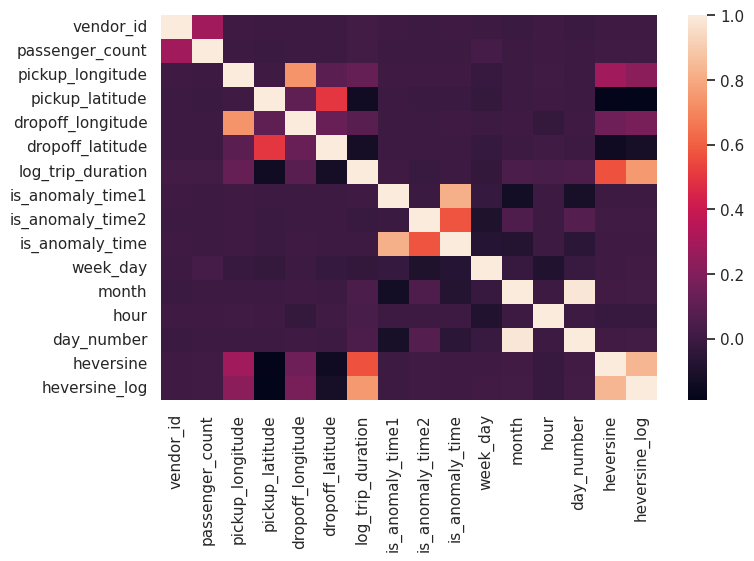

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
sns.heatmap(train.corr());

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

id  vendor_id     pickup_datetime     dropoff_datetime  \
1107     id0729156          2 2016-06-23 13:36:48  2016-06-23 13:36:50   
644165   id0401529          2 2016-06-02 15:19:35  2016-06-02 15:32:59   
595540   id1723416          1 2016-03-20 21:07:56  2016-03-20 21:12:35   
1001028  id1653963          2 2016-06-12 06:35:13  2016-06-12 06:35:15   
1176337  id3619353          2 2016-02-13 20:28:30  2016-02-13 20:28:37   
923793   id1001696          1 2016-02-24 21:02:32  2016-02-24 21:25:57   
974378   id1510552          2 2016-01-06 20:40:52  2016-01-06 20:51:03   
377068   id0116374          1 2016-04-02 20:33:19  2016-04-02 20:38:01   
184925   id2306955          1 2016-05-07 18:58:53  2016-05-07 19:12:05   
275644   id0978162          1 2016-02-24 16:20:59  2016-02-24 16:35:34   

         passenger_count  pickup_longitude  pickup_latitude  \
1107                   3        -73.827660        40.716175   
644165                 1        -73.980751        40.757111   
595540                 1        -78.547401        40.817131   
1001028                3        -73.922890        40.858200   
1176337                1        -73.936974        40.764610   
923793                 1        -73.972366        40.758633   
974378                 5        -71.799896        35.081532   
377068                 1        -74.007095        40.717113   
184925                 1        -72.809669        51.881084   
275644                 4        -75.354332        34.712234   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
1107            -73.822113         40.711452                  N  ...   
644165          -74.240051         38.478298                  N  ...   
595540          -79.786133         40.917637                  N  ...   
1001028         -73.925850         40.851521                  N  ...   
1176337         -73.789848         40.646858                  N  ...   
923793          -79.553535         43.674000                  N  ...   
974378          -79.352837         40.436329                  N  ...   
377068          -76.963242         38.946033                  N  ...   
184925          -73.987228         40.750599                  N  ...   
275644          -73.834923         32.181141                  N  ...   

         is_anomaly_time1 is_anomaly_time2  is_anomaly_time  week_day  month  \
1107                False            False            False         3      6   
644165              False            False            False         3      6   
595540              False            False            False         6      3   
1001028             False            False            False         6      6   
1176337             False            False            False         5      2   
923793              False            False            False         2      2   
974378              False            False            False         2      1   
377068              False            False            False         5      4   
184925              False            False            False         5      5   
275644              False            False            False         2      2   

         hour  day_number    heversine  heversine_log   mean_speed  
1107       13         175     0.703065       0.532429  1265.516683  
644165     15         154   254.363523       5.542688  1138.941146  
595540     21          80   104.759971       4.661172  1351.741558  
1001028     6         164     0.783347       0.578492  1410.024743  
1176337    20          44    18.034405       2.946248  9274.836731  
923793     21          55   562.235188       6.333697  1440.602617  
974378     20           6   891.214103       6.793706  5251.015993  
377068     20          93   320.125775       5.771833  4086.712020  
184925     18         128  1240.908677       7.124405  5640.493985  
275644     16          55   314.764203       5.754996  1295.029865  

[10 rows x 22 columns]

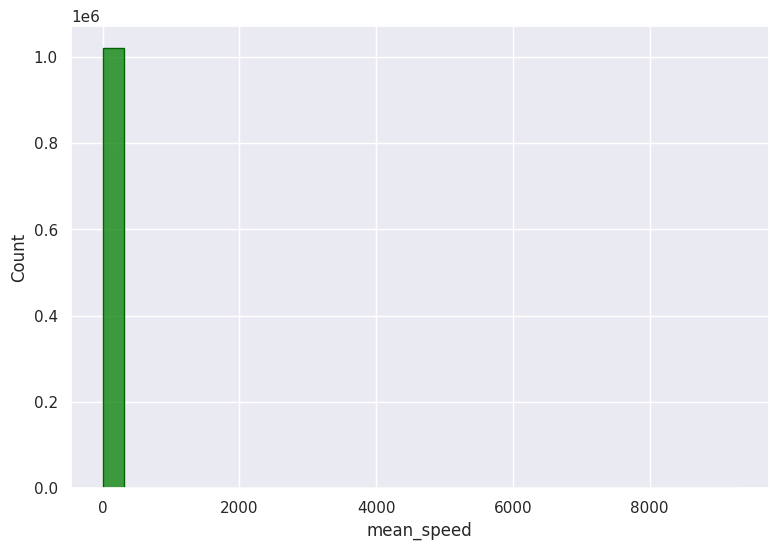

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots(figsize=(9, 6))
train['mean_speed'] = train['heversine'] /  (np.expm1(train['log_trip_duration']) / (60 * 60))
train["mean_speed"]
sns.histplot(train['mean_speed'],
             bins=30,
             ax=ax,
             color='green',
             edgecolor='darkgreen');
train[train["mean_speed"] > 1000]

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'log_trip_duration', 'days', 'is_anomaly_time1', 'is_anomaly_time2',
       'is_anomaly_time', 'week_day', 'month', 'hour', 'day_number',
       'heversine', 'heversine_log', 'mean_speed'],
      dtype='object')

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

shape:  (168, 1)


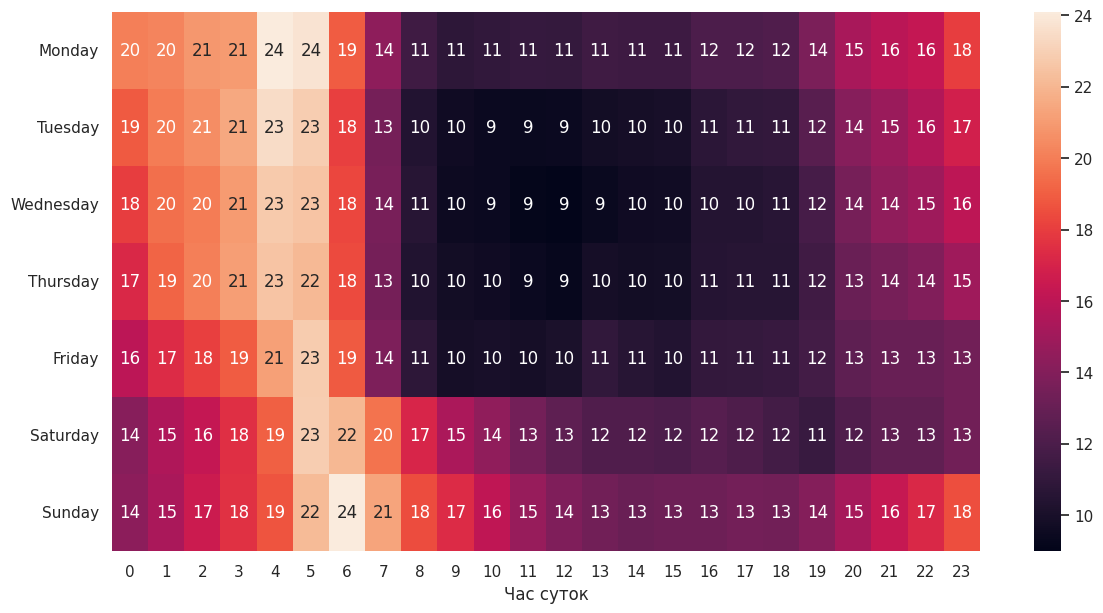

In [ ]:
df_speed_cor = train.groupby(['week_day', 'hour']).median()['mean_speed'].to_frame()
print("shape: ", df_speed_cor.shape)
first_day = df_speed_cor.loc[0].to_numpy().squeeze()
second_day = df_speed_cor.loc[1].to_numpy().squeeze()
third_day = df_speed_cor.loc[2].to_numpy().squeeze()
fouth_day = df_speed_cor.loc[3].to_numpy().squeeze()
fiveth_day = df_speed_cor.loc[4].to_numpy().squeeze()
sixth_day = df_speed_cor.loc[5].to_numpy().squeeze()
seventh_day = df_speed_cor.loc[6].to_numpy().squeeze()

table = pd.DataFrame([first_day, second_day, third_day, fouth_day, fiveth_day, sixth_day, seventh_day],
                    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
fig, ax = plt.subplots(figsize=(14, 7))
ax = sns.heatmap(table, annot=True, fmt=".0f", ax=ax)
ax.set_xlabel('Час суток', fontsize=12);

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Значение скорости нельзя использовать, так как этот признак не доступен на момент предсказания моделью. До поездки невозможно предсказать значение скорости.

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: скорость минимальна во вторник с 10 до 12 часов утра, в среду с 10 до 13 часов, в четверг с 11 до 12. Скорость максимальна в понедельник с 4 до 5 и в воскресенье в 6 утра.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train1 = train
train1["cork_time_period"] = train1.apply(lambda x: 1 if x.week_day in [1,2,3,4] and x.hour in range(9,19) else 0,
                                         axis=1)
train1["free_roads_period"] = train1["cork_time_period"].apply(lambda x: 1 if x == 0 else 0)
train1.head()

id  vendor_id     pickup_datetime     dropoff_datetime  \
400828  id0816973          2 2016-03-20 05:07:40  2016-03-20 05:31:31   
579180  id0180371          2 2016-02-28 03:32:21  2016-02-28 03:40:00   
639327  id3056393          1 2016-04-25 14:27:48  2016-04-25 14:33:22   
764490  id3702742          2 2016-03-29 14:05:45  2016-03-29 14:22:07   
666135  id1174909          1 2016-01-21 12:47:54  2016-01-21 12:50:53   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
400828                5        -73.988380        40.749142         -73.942543   
579180                2        -74.004013        40.741974         -74.009628   
639327                1        -73.997826        40.741142         -74.003960   
764490                1        -73.963730        40.774349         -73.943108   
666135                1        -73.963448        40.757465         -73.964661   

        dropoff_latitude store_and_fwd_flag  ...  is_anomaly_time week_day  \
400828         40.826950                  N  ...            False        6   
579180         40.720165                  N  ...            False        6   
639327         40.731659                  N  ...            False        0   
764490         40.777321                  N  ...            False        1   
666135         40.755516                  N  ...            False        3   

        month  hour  day_number  heversine  heversine_log  mean_speed  \
400828      3     5          80   9.473505       2.348849   23.832717   
579180      2     3          59   2.470736       1.244367   19.378318   
639327      4    14         116   1.174339       0.776725   12.657544   
764490      3    14          89   1.767649       1.017998    6.480178   
666135      1    12          21   0.239629       0.214812    4.819352   

        cork_time_period  free_roads_period  
400828                 0                  1  
579180                 0                  1  
639327                 0                  1  
764490                 1                  0  
666135                 1                  0  

[5 rows x 24 columns]

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [ ]:
train1["special_point_begin"] = train1.apply(lambda x: 1 if x.pickup_latitude >= 40.68892 and
                                                 x.pickup_latitude <= 40.69554 and x.pickup_longitude >= -74.18479 and
                                                x.pickup_longitude <= -74.17467 else 0, axis=1)

train1["special_point_end"] = train1.apply(lambda x: 1 if x.dropoff_latitude >= 40.68892 and
                                                 x.dropoff_latitude <= 40.69554 and x.dropoff_longitude >= -74.18479 and
                                                x.dropoff_longitude <= -74.17467 else 0, axis=1)

In [ ]:
#data_for_map = train.samp

In [ ]:
show_circles_on_map(train1.sample(2000), "pickup_latitude", "pickup_longitude", "blue")

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
up_l = (40.80265, -74.02096)
up_r = (40.80265, -73.93779)
down_l = (40.69982, -74.02096)
down_r = (40.69982, -73.93779)
list_t = [up_l, up_r, down_r, down_l, up_l]

def draw_lines(data, latitude_column, longitude_column, color):
    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    h_dist = abs(up_l[0] - down_l[0]) / 5 # number of rows
    w_dist = abs(down_l[1] - down_r[1]) / 5 # number of columns
    left_points_vertical = [(up_l[0], i * w_dist + min(down_l[1], down_r[1])) for i in range(6)]
    right_points_vertical = [(down_l[0], point[1]) for point in left_points_vertical]

    left_points = [(min(up_l[0], down_l[0]) + i * h_dist, up_l[1]) for i in range(6)]
    right_points = [(point[0], down_r[1]) for point in left_points]
    horizontal_lines = [folium.PolyLine([left_points[i], right_points[i]]).add_to(m) for i in range(6)]
    vertical_lines = [folium.PolyLine([left_points_vertical[i], right_points_vertical[i]]).add_to(m) for i in range(6)]
    folium.PolyLine(list_t).add_to(m)
    return m, left_points, left_points_vertical

m, left_points, right_points = draw_lines(train1.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

def cell_belong(x, left_points, up_points, rows_count, column_count, latitude, longtitude):
    for i in range(len(left_points) - 1):
        for j in range(len(up_points) - 1):
            if left_points[i][0] <= x[latitude] and x[latitude] <= left_points[i + 1][0] and right_points[j][1] <= x[longtitude] and x[longtitude] <= right_points[j + 1][1]: return i * column_count + j + 1
    return -1

In [82]:
def show_circles_on_map(m, data, latitude_column, longitude_column, color):
    location = (data[latitude_column].mean(), data[longitude_column].mean())

    for _, row in data.iterrows():
        i = cell_belong(row,left_points, right_points, 5, 5, latitude_column, longitude_column)
        if i == -1: continue
        folium.Circle(
            radius=100,
            popup=str(i),
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

show_circles_on_map(m, train1.sample(100), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, grid_coordinates, rows_count=5, columns_count=5):
        self._grid_coordinates = grid_coordinates
        self._rows_count = rows_count
        self._columns_count = columns_count

    def draw_map_lines(self):
        up_l = (40.80265, -74.02096)
        up_r = (40.80265, -73.93779)
        down_l = (40.69982, -74.02096)
        down_r = (40.69982, -73.93779)
        h_dist = abs(up_l[0] - down_l[0]) / self._rows_count # number of rows
        w_dist = abs(down_l[1] - down_r[1]) / self._columns_count # number of columns
        left_points_vertical = [(up_l[0], i * w_dist + min(down_l[1], down_r[1])) for i in range(self._columns_count + 1)]
        right_points_vertical = [(down_l[0], point[1]) for point in left_points_vertical]
        left_points = [(min(up_l[0], down_l[0]) + i * h_dist, up_l[1]) for i in range(self._rows_count + 1)]
        right_points = [(point[0], down_r[1]) for point in left_points]
        return left_points, left_points_vertical

    def fit(self, X=None, y=None):
        self.horizontal_points, self.vertical_points = self.draw_map_lines()
        return self

    def transform(self, X, y=None):
        data = X.copy()
        data["start_cell"] = data.apply(lambda x: cell_belong(x, self.horizontal_points,
                                                             self.vertical_points, self._rows_count,
                                                              self._columns_count, "pickup_latitude",
                                                              "pickup_longitude"), axis=1)
        data["end_cell"] = data.apply(lambda x: cell_belong(x, self.horizontal_points,
                                                             self.vertical_points, self._rows_count,
                                                              self._columns_count, "dropoff_latitude",
                                                              "dropoff_longitude"), axis=1)
        return data






In [ ]:
transformer = MapGridTransformer(list_t, 5, 5)
train2 = transformer.fit_transform(train1)
train2.sample(10)

id  vendor_id     pickup_datetime     dropoff_datetime  \
1061594  id2953194          1 2016-05-26 06:21:34  2016-05-26 06:25:20   
800472   id1113641          1 2016-01-15 13:28:42  2016-01-15 13:31:05   
1287398  id3853085          2 2016-02-08 20:39:06  2016-02-08 20:45:36   
85480    id0247251          1 2016-06-22 05:01:42  2016-06-22 05:06:41   
747799   id3844040          1 2016-06-04 19:01:38  2016-06-04 19:11:56   
164402   id3355515          1 2016-01-11 09:49:17  2016-01-11 10:02:08   
1219481  id1470928          2 2016-04-01 20:06:40  2016-04-01 20:22:33   
412978   id3544258          1 2016-04-20 12:25:48  2016-04-20 12:31:03   
1122437  id2274193          2 2016-03-11 13:20:22  2016-03-11 13:37:07   
127722   id2233923          2 2016-05-23 07:16:05  2016-05-23 07:59:59   

         passenger_count  pickup_longitude  pickup_latitude  \
1061594                1        -73.990417        40.756111   
800472                 1        -73.990295        40.769878   
1287398                2        -73.988823        40.731243   
85480                  1        -73.991463        40.749512   
747799                 1        -73.991547        40.744198   
164402                 1        -73.979279        40.734760   
1219481                1        -73.986382        40.751339   
412978                 1        -73.988480        40.737122   
1122437                1        -73.990639        40.756207   
127722                 2        -73.863800        40.769852   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
1061594         -73.996162         40.753407                  N  ...   
800472          -73.989815         40.767010                  N  ...   
1287398         -73.992264         40.725056                  N  ...   
85480           -73.978760         40.740341                  N  ...   
747799          -73.978882         40.762909                  N  ...   
164402          -74.007355         40.705162                  N  ...   
1219481         -73.977753         40.730358                  N  ...   
412978          -73.985939         40.741692                  N  ...   
1122437         -74.013016         40.709728                  N  ...   
127722          -73.980240         40.765800                  N  ...   

         day_number heversine  heversine_log  mean_speed  cork_time_period  \
1061594         147  0.569743       0.450912    9.075555                 0   
800472           15  0.321538       0.278796    8.094652                 1   
1287398          39  0.746611       0.557677    6.891793                 0   
85480           174  1.478185       0.907526   17.797544                 0   
747799          156  2.338130       1.205411   13.620174                 0   
164402           11  4.053443       1.620070   18.926583                 0   
1219481          92  2.443604       1.236519    9.230823                 0   
412978          111  0.551402       0.439159    6.301737                 1   
1122437          71  5.501339       1.872008   19.706288                 1   
127722          144  9.816297       2.381054   13.416351                 0   

         free_roads_period  special_point_begin  special_point_end  \
1061594                  1                    0                  0   
800472                   0                    0                  0   
1287398                  1                    0                  0   
85480                    1                    0                  0   
747799                   1                    0                  0   
164402                   1                    0                  0   
1219481                  1                    0                  0   
412978                   0                    0                  0   
1122437                  0                    0                  0   
127722                   1                    0                  0   

         start_cell  end_cell  
1061594          12        12  
800472           17 

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [ ]:
train, test = train_test_split(train2, test_size=0.2)
y_train = train["log_trip_duration"]
y_test = test["log_trip_duration"]

categorical_variables = ["week_day", "month", "hour", "cork_time_period", "free_roads_period", "special_point_begin",
                        "special_point_end", "start_cell", "end_cell", "is_anomaly_time"]

num_variables = ["day_number", "heversine_log"]

model = Ridge()

x_cat_train = train[categorical_variables]
x_cat_test = test[categorical_variables]
x_num_train = train[num_variables]
x_num_test = test[num_variables]

scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False)

scaled_num_train = scaler.fit_transform(x_num_train)
scaled_num_test = scaler.transform(x_num_test)

encoded_train = encoder.fit_transform(x_cat_train)
encoded_test = encoder.transform(x_cat_test)

x_train = np.concatenate([scaled_num_train, encoded_train], axis=1)
x_test = np.concatenate([scaled_num_test, encoded_test], axis=1)

print("train shape: ", x_train.shape)
print("test shape: ", x_test.shape)

train shape:  (816840, 101)
test shape:  (204210, 101)


In [ ]:
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("mse train result: ", mean_squared_error(y_train, y_pred_train, squared=False))
print("mse test result: ", mean_squared_error(y_test, y_pred_test, squared=False))

mse train result:  0.481072316382918
mse test result:  0.48433816065540664


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: Число пассажиров может влиять на длительность поездки: если пассажир один или двое, поездка скорее всего начинается и заканчивается в городе, в то время как поездка для большего числа пассажиров может заканчиваться за городом и длиться дольше.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [ ]:
print("Уникальные значения vendor_id: ", np.unique(train2["vendor_id"]))
print("Уникальные значения passenger_count: ", np.unique(train2["passenger_count"]))
print("Уникальные значения store_and_fwd_flag: ", np.unique(train2["store_and_fwd_flag"]))

Уникальные значения vendor_id:  [1 2]
Уникальные значения passenger_count:  [0 1 2 3 4 5 6 7 8 9]
Уникальные значения store_and_fwd_flag:  ['N' 'Y']


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
train2["vendor_id"] = train2["vendor_id"].apply(lambda x: 0 if x == 1 else 1)
train2["store_and_fwd_flag"] = train2["store_and_fwd_flag"].apply(lambda x: 0 if x == 'N' else 1)

print("Уникальные значения vendor_id: ", np.unique(train2["vendor_id"]))
print("Уникальные значения store_and_fwd_flag: ", np.unique(train2["store_and_fwd_flag"]))

Уникальные значения vendor_id:  [0 1]
Уникальные значения store_and_fwd_flag:  [0 1]


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [ ]:
categorical_variables = categorical_variables + ["vendor_id", "store_and_fwd_flag"]
num_variables = num_variables + ["passenger_count"]
categorical_variables

['week_day',
 'month',
 'hour',
 'cork_time_period',
 'free_roads_period',
 'special_point_begin',
 'special_point_end',
 'start_cell',
 'end_cell',
 'is_anomaly_time',
 'vendor_id',
 'store_and_fwd_flag']

In [ ]:
model = Ridge()

x_cat_train = train[categorical_variables]
x_cat_test = test[categorical_variables]
x_num_train = train[num_variables]
x_num_test = test[num_variables]

scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False)

scaled_num_train = scaler.fit_transform(x_num_train)
scaled_num_test = scaler.transform(x_num_test)

encoded_train = encoder.fit_transform(x_cat_train)
encoded_test = encoder.transform(x_cat_test)

x_train = np.concatenate([scaled_num_train, encoded_train], axis=1)
x_test = np.concatenate([scaled_num_test, encoded_test], axis=1)

model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("mse train result: ", mean_squared_error(y_train, y_pred_train, squared=False))
print("mse test result: ", mean_squared_error(y_test, y_pred_test, squared=False))

mse train result:  0.48088877038346134
mse test result:  0.48413300492134587


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Поскольку последние признаки не дали ощутимого улучшения метрики, выбросим их из данных.

In [ ]:
train3 = train2.drop(columns=["vendor_id", "passenger_count", "store_and_fwd_flag"])
train3.columns

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'log_trip_duration', 'days', 'is_anomaly_time1', 'is_anomaly_time2',
       'is_anomaly_time', 'week_day', 'month', 'hour', 'day_number',
       'heversine', 'heversine_log', 'mean_speed', 'cork_time_period',
       'free_roads_period', 'special_point_begin', 'special_point_end',
       'start_cell', 'end_cell'],
      dtype='object')

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

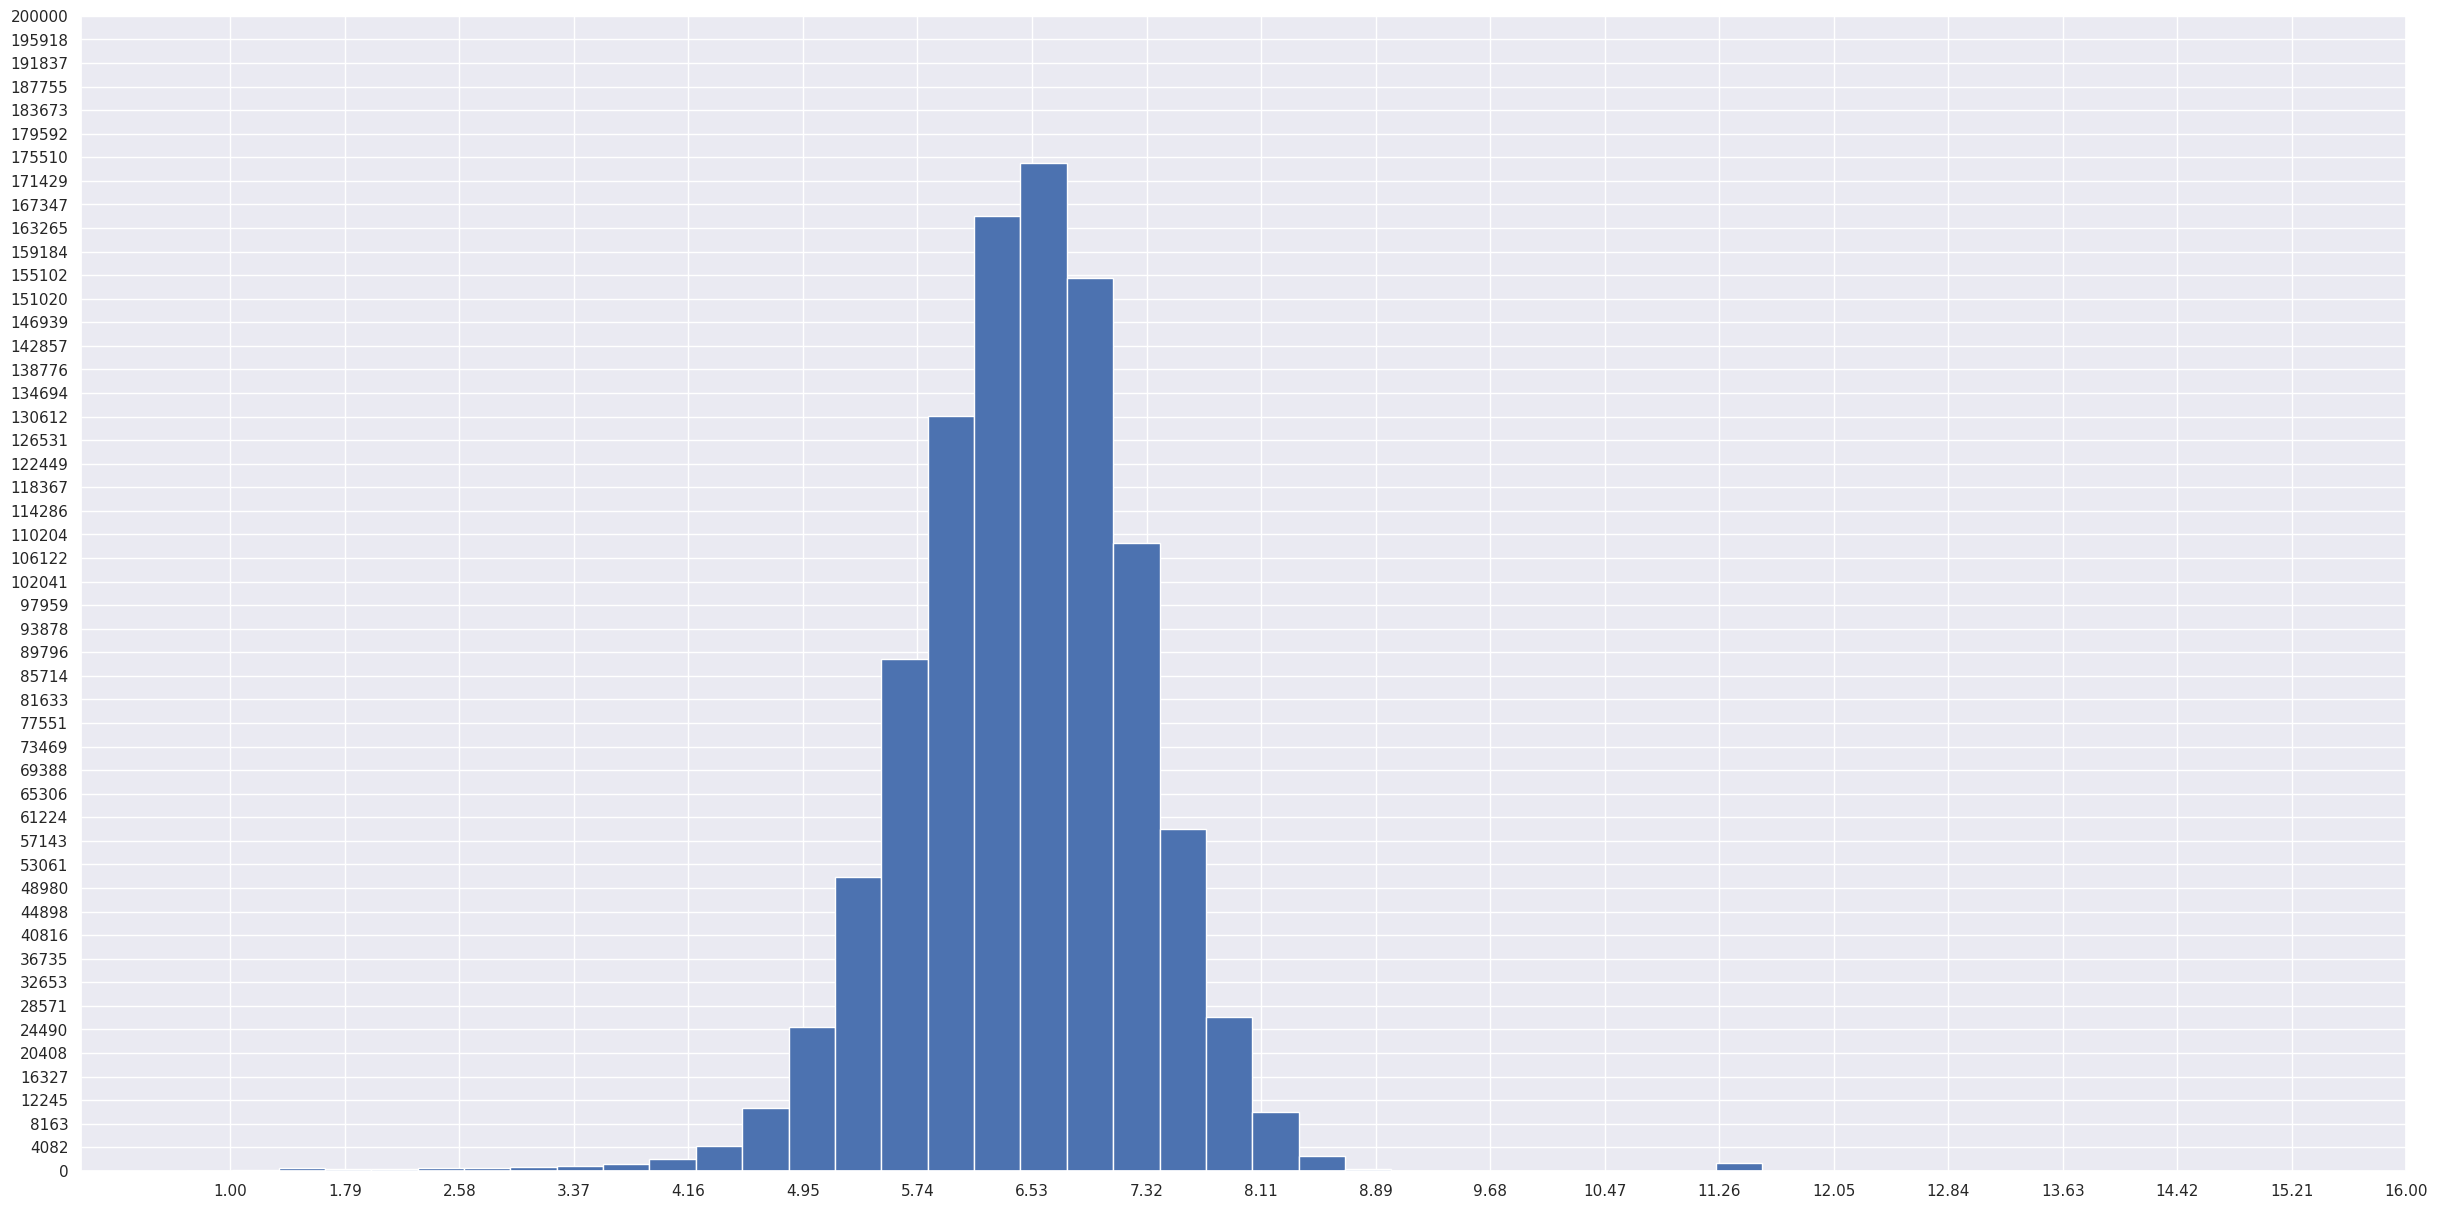

In [ ]:
hist1 = train3["log_trip_duration"].hist(bins=45)
hist1.set_xticks(np.linspace(1, 16, 20))
hist1.set_yticks(np.linspace(0, 200000, 50))
hist1.figure.set_size_inches(30, 15)

In [ ]:
quantile1 = np.quantile(train3["log_trip_duration"], q=0.004)
quantile99 = np.quantile(train3["log_trip_duration"], q=0.9985)
print("Квантиль уровня 0.004: ", quantile1)
print("Квантиль уровня 0.9985: ", quantile99)

train4 = train3.drop(train3[(quantile99 < train3["log_trip_duration"]) | (train3["log_trip_duration"] < quantile1)].index)

Квантиль уровня 0.004:  3.6635616461296463
Квантиль уровня 0.9985:  8.960696374821312


Посмотрим на гистограмму распределения после удаления выбросов:

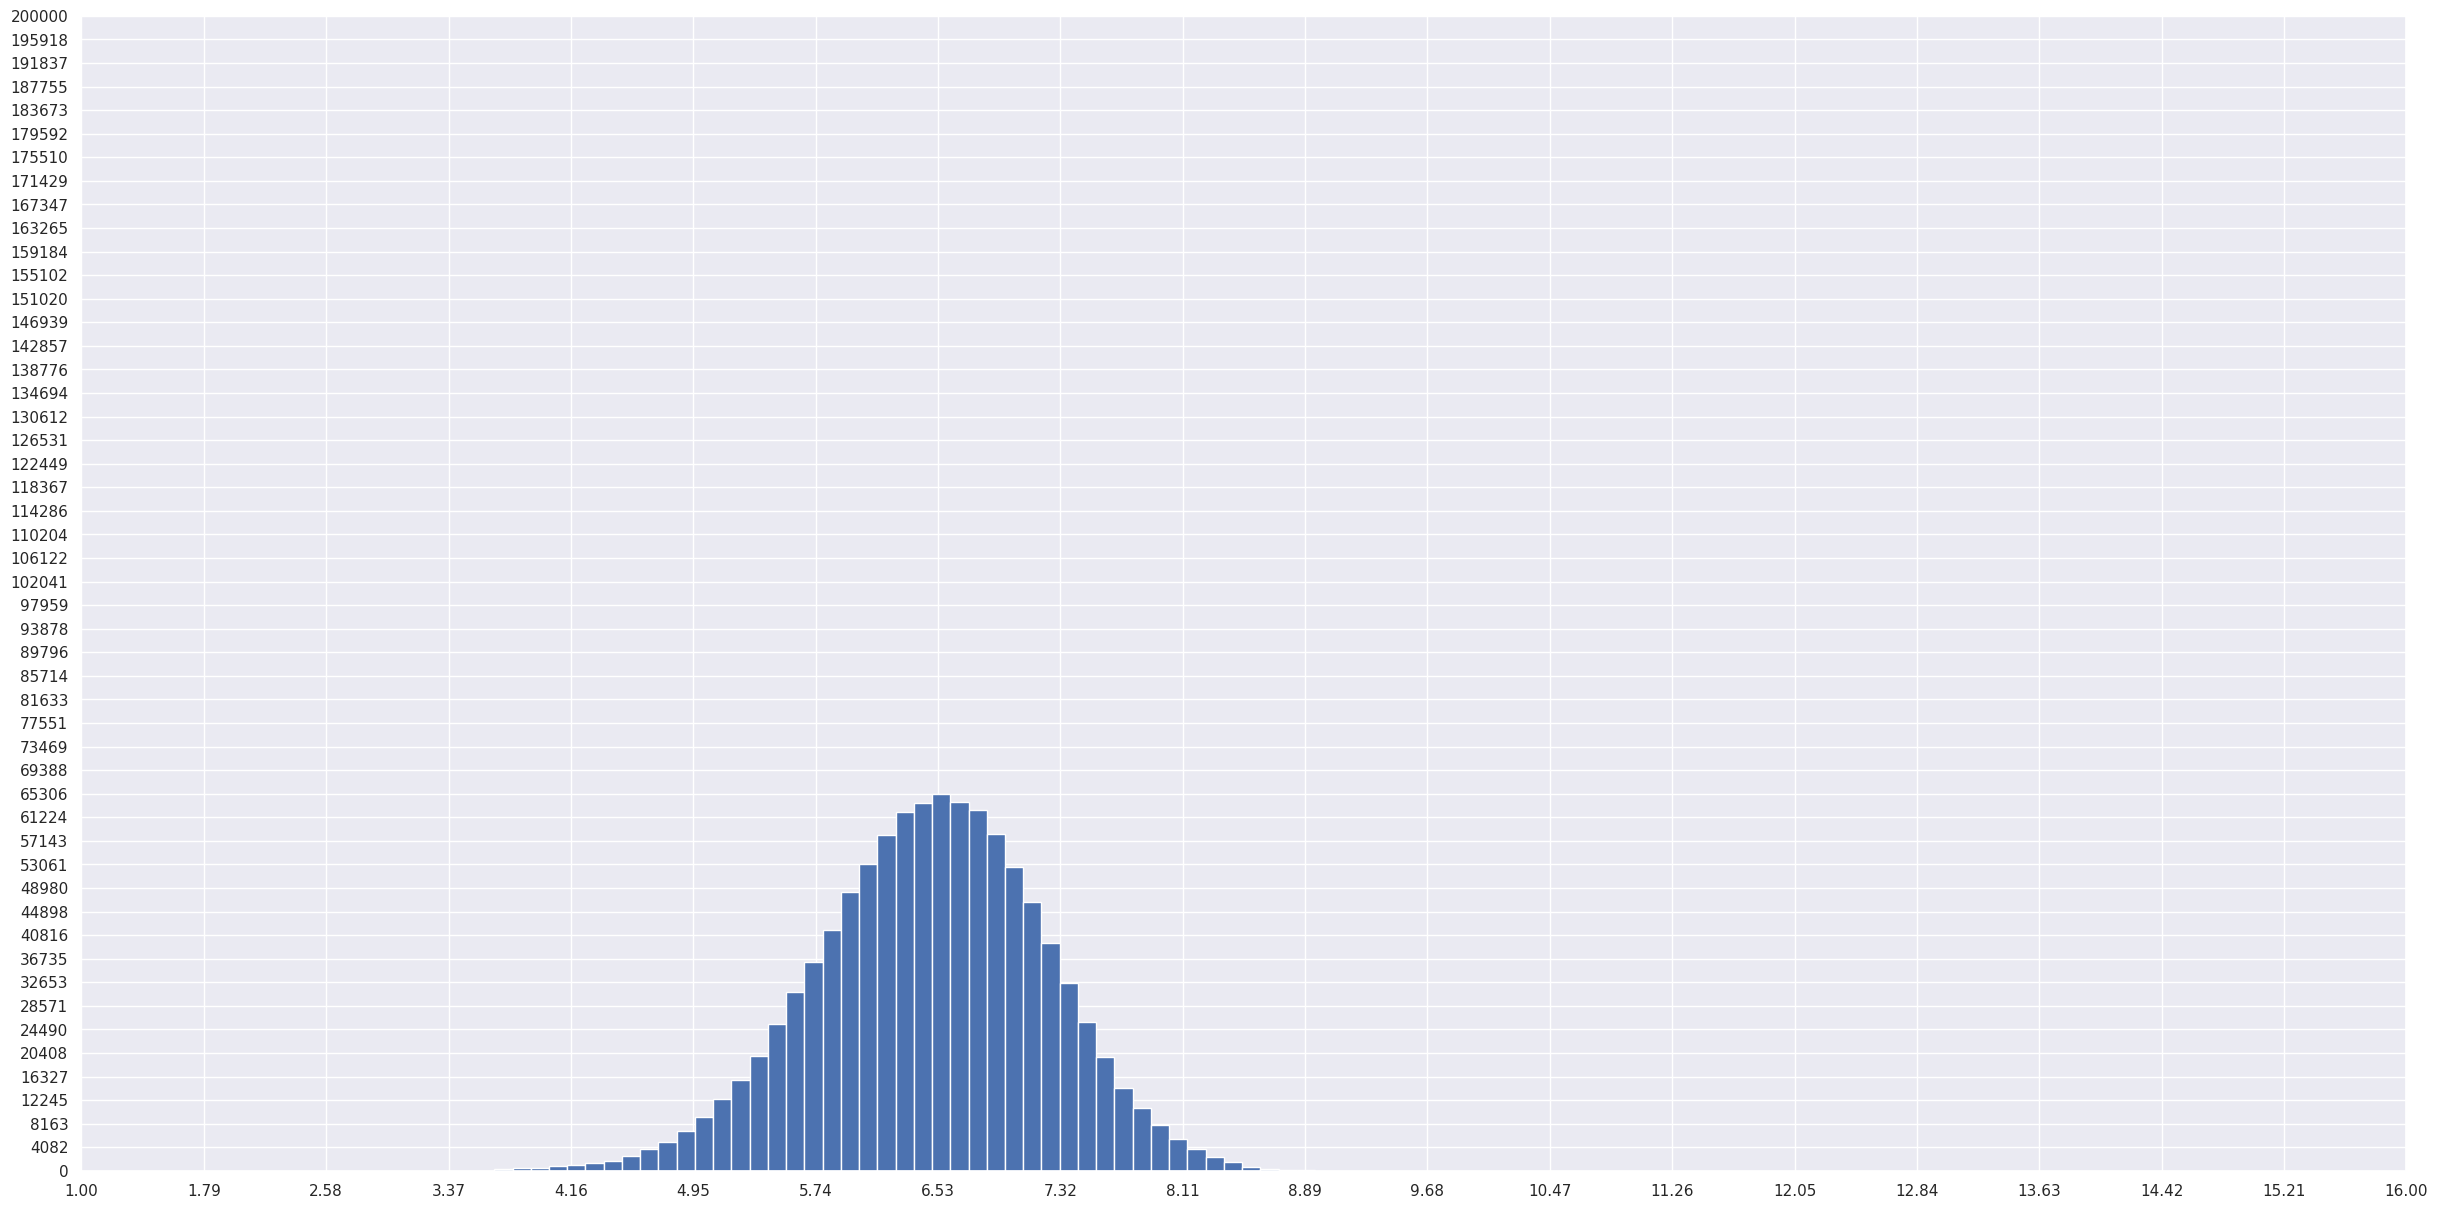

In [ ]:
hist2 = train4["log_trip_duration"].hist(bins=45)
hist2.set_xticks(np.linspace(1, 16, 20))
hist2.set_yticks(np.linspace(0, 200000, 50))
hist2.figure.set_size_inches(30, 15)

In [ ]:
print("Число удалённых объектов: ",train3.shape[0] - train4.shape[0])

Число удалённых объектов:  5565


In [ ]:
train4.columns

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'log_trip_duration', 'days', 'is_anomaly_time1', 'is_anomaly_time2',
       'is_anomaly_time', 'week_day', 'month', 'hour', 'day_number',
       'heversine', 'heversine_log', 'mean_speed', 'cork_time_period',
       'free_roads_period', 'special_point_begin', 'special_point_end',
       'start_cell', 'end_cell'],
      dtype='object')

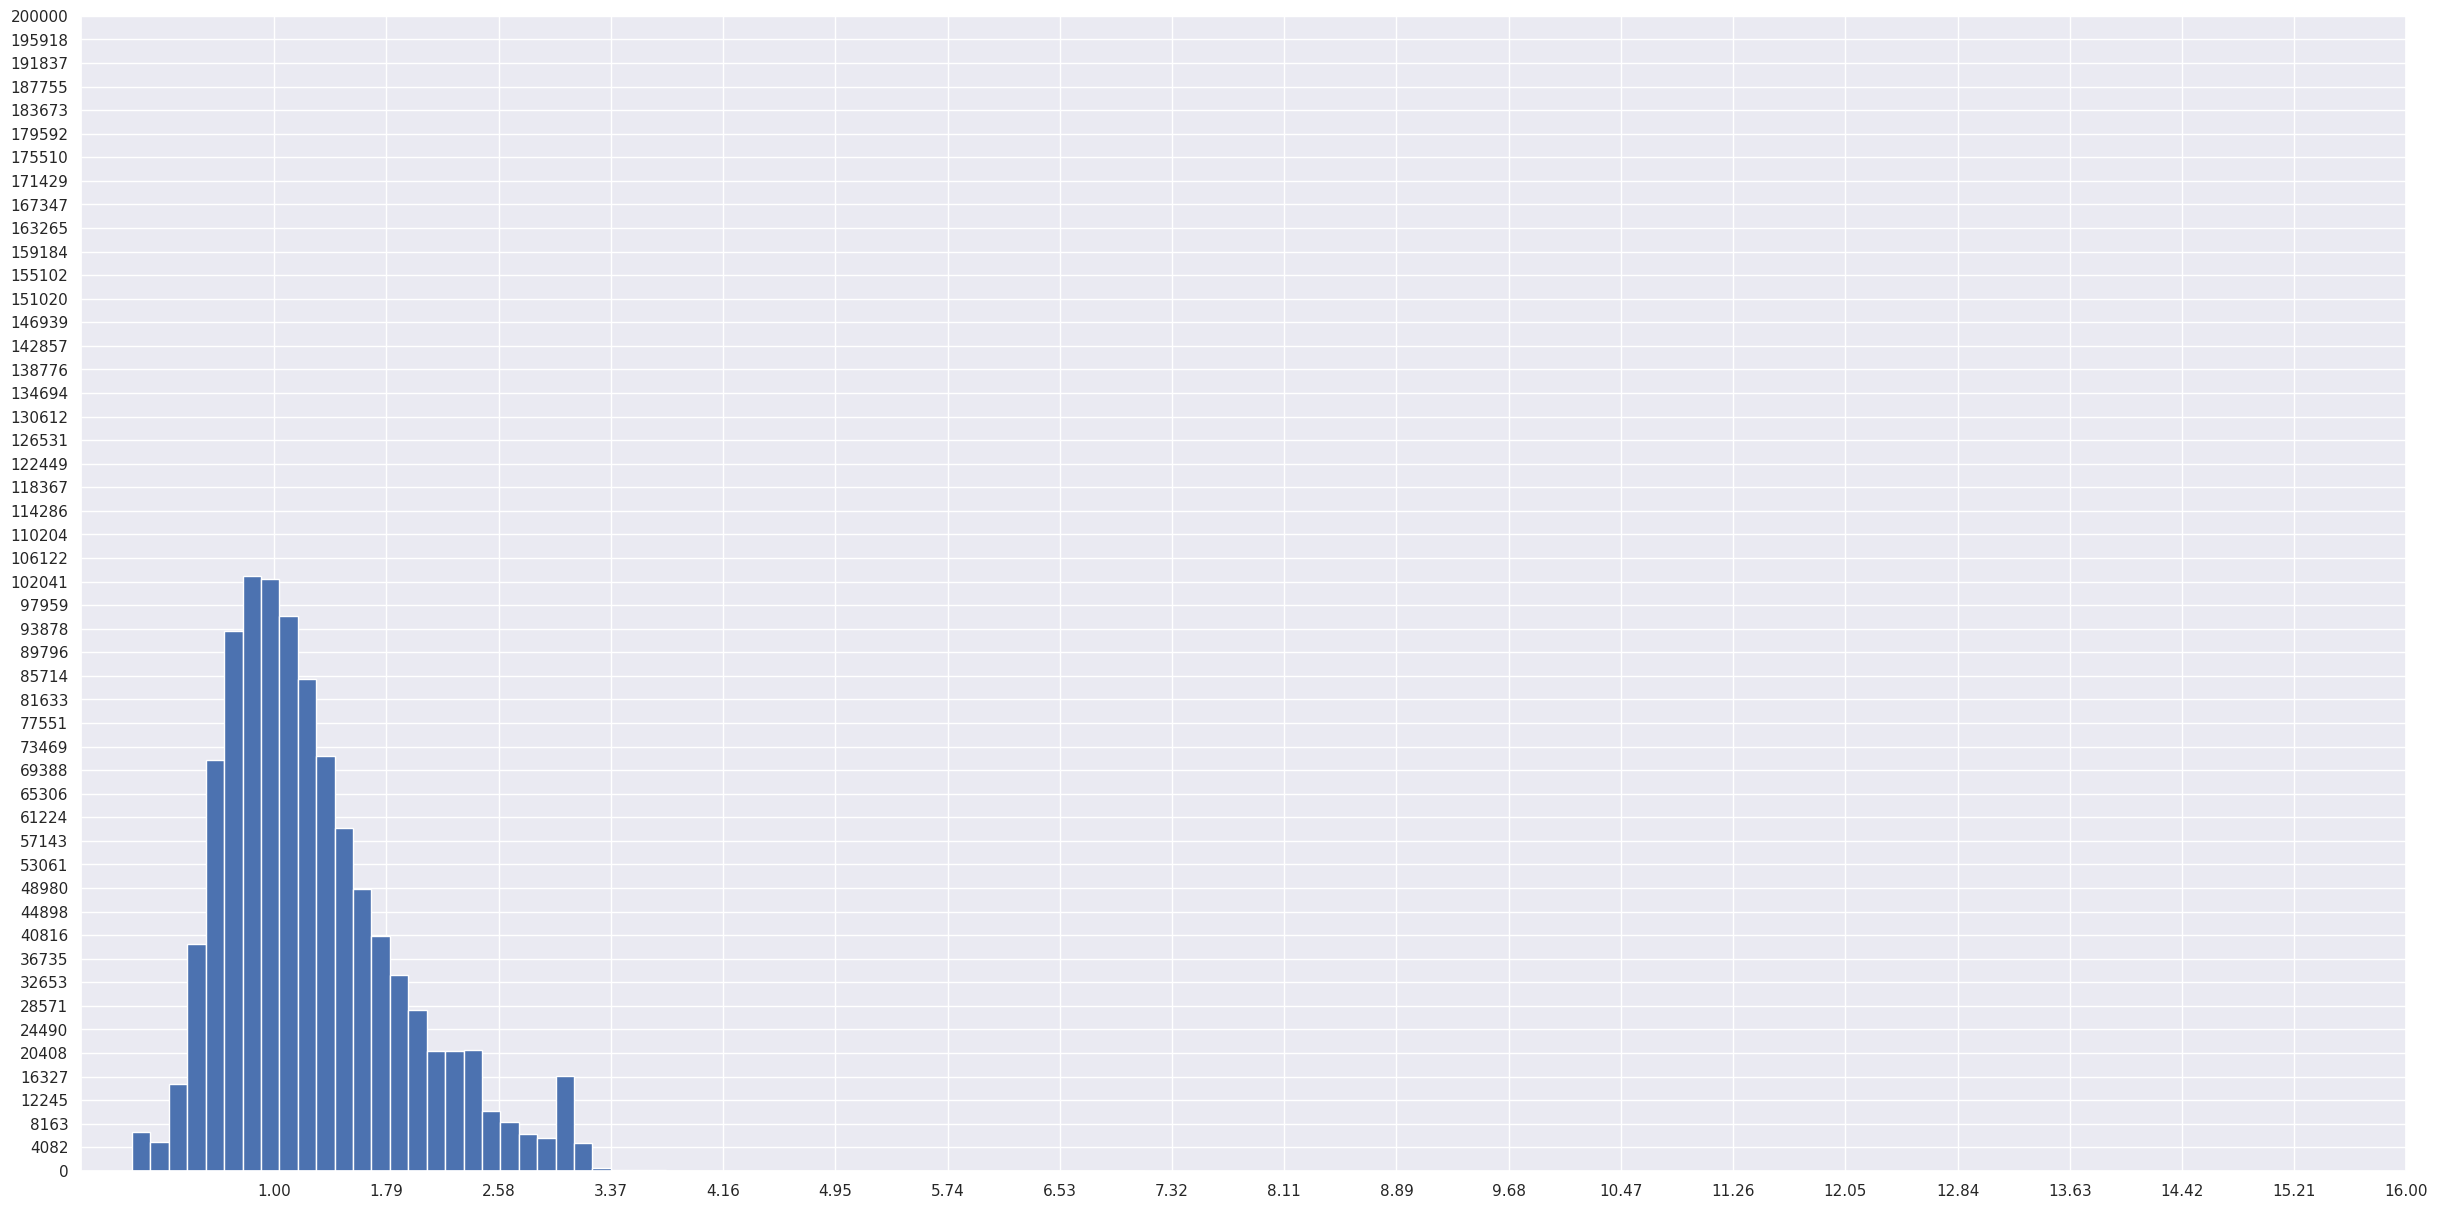

In [ ]:
hist3 = train4["heversine_log"].hist(bins=55)
hist3.set_xticks(np.linspace(1, 16, 20))
hist3.set_yticks(np.linspace(0, 200000, 50))
hist3.figure.set_size_inches(30, 15)

In [ ]:
heversine_quantile = np.quantile(train4["heversine_log"], q=0.998)
train5 = train4.drop(train4[train4["heversine_log"] > heversine_quantile].index)
print("Число удалённых объектов: ", train4.shape[0] - train5.shape[0])

Число удалённых объектов:  2031


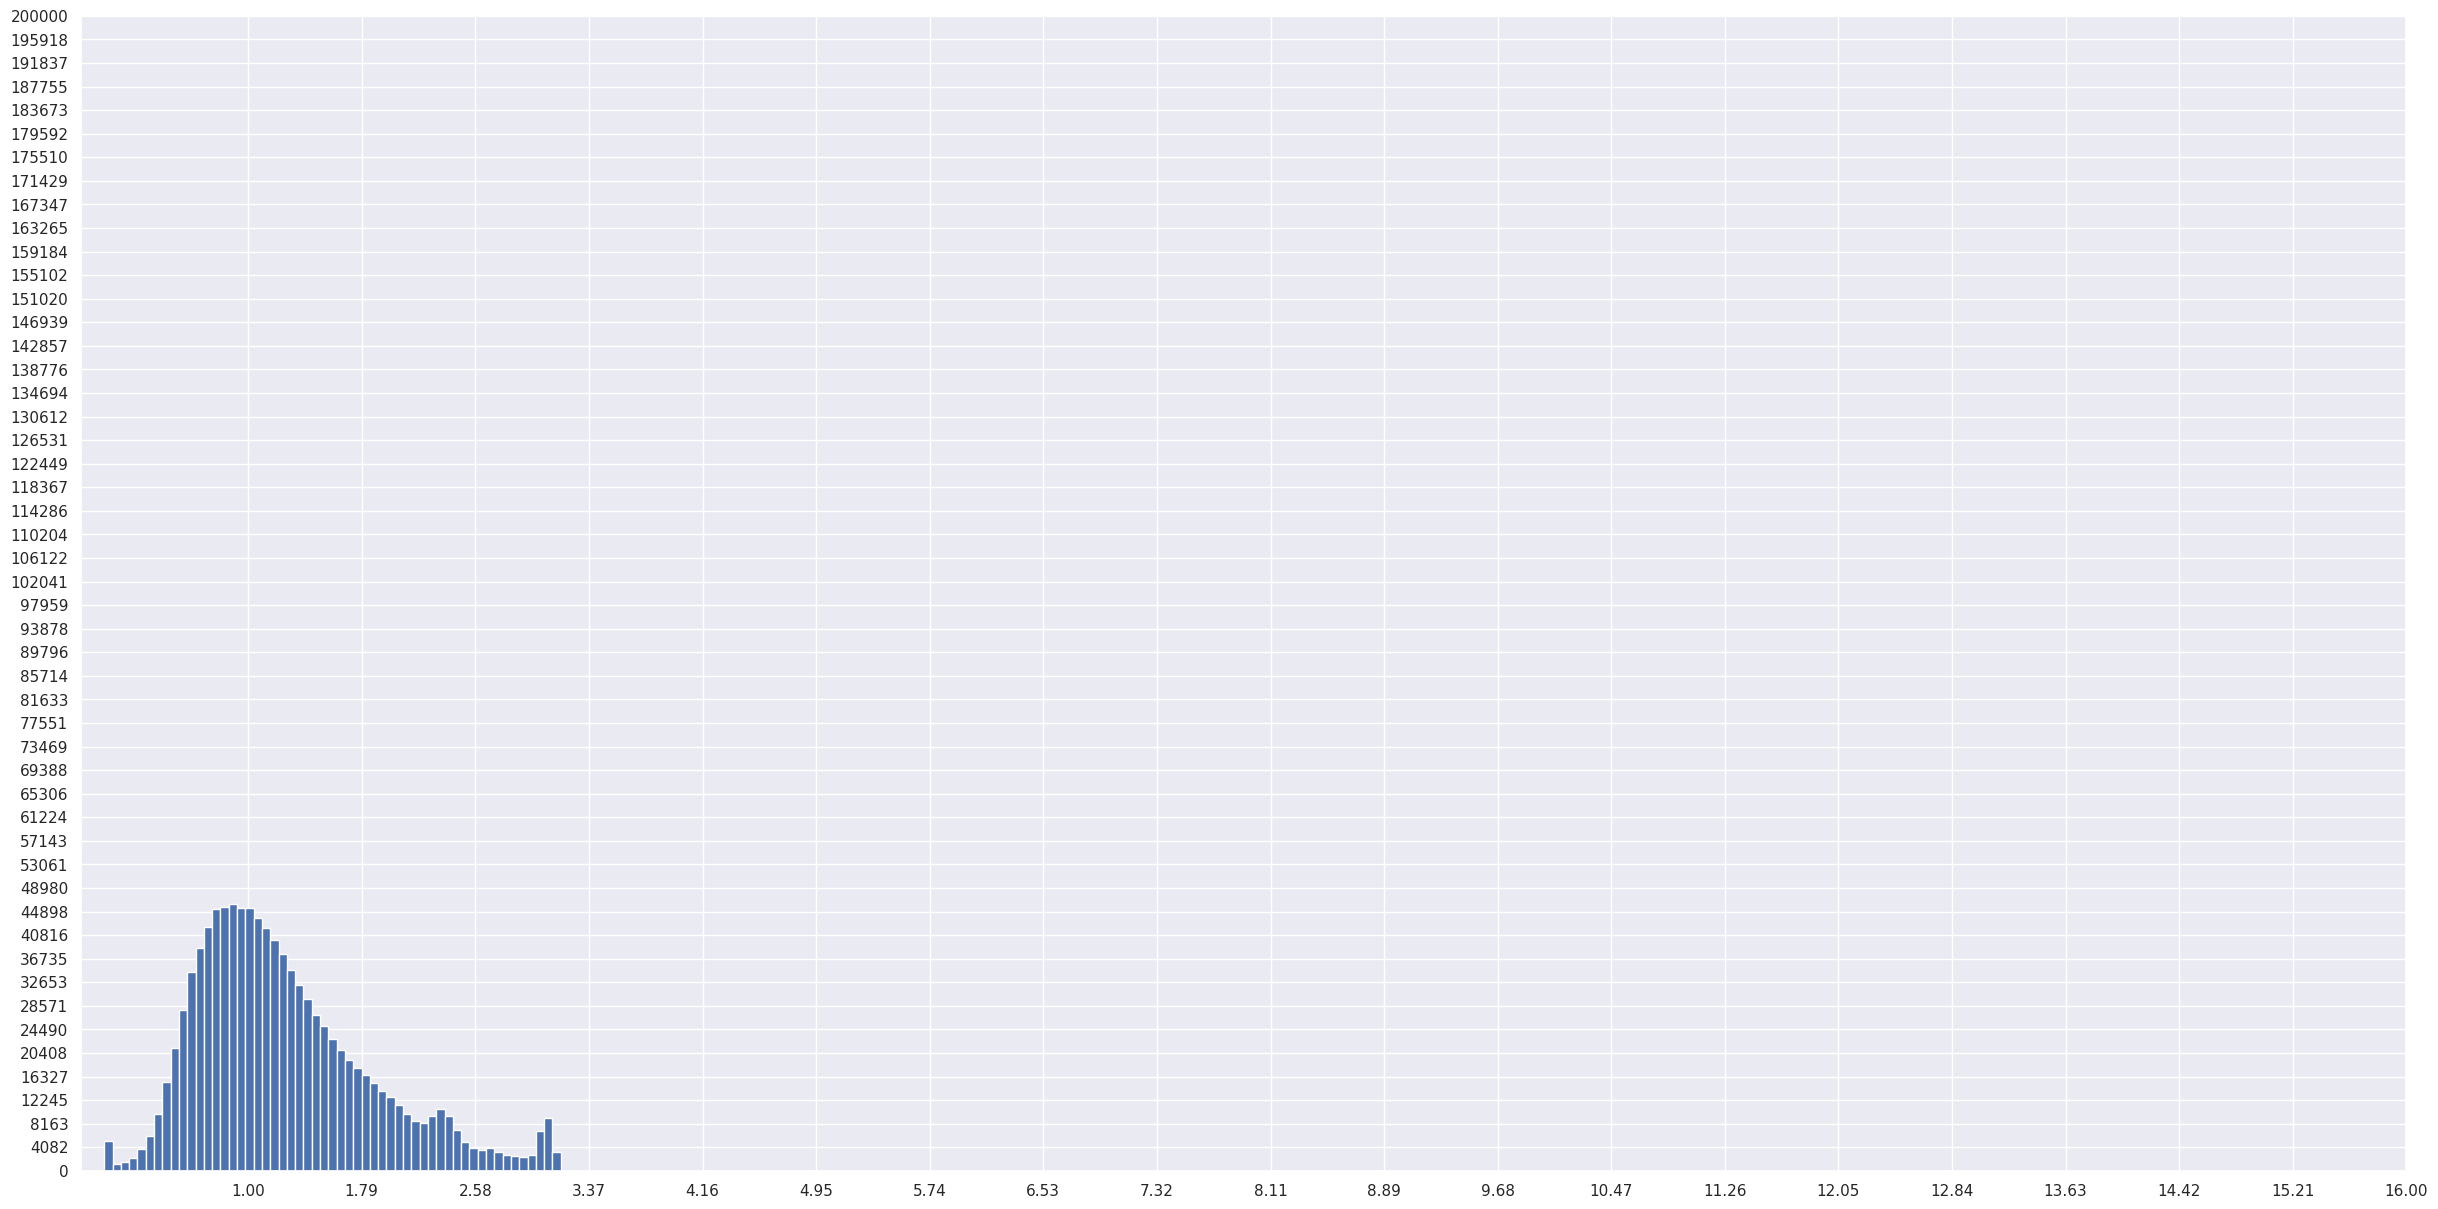

In [ ]:
hist4 = train5["heversine_log"].hist(bins=55)
hist4.set_xticks(np.linspace(1, 16, 20))
hist4.set_yticks(np.linspace(0, 200000, 50))
hist4.figure.set_size_inches(30, 15)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [ ]:
categorical_variables

['week_day',
 'month',
 'hour',
 'cork_time_period',
 'free_roads_period',
 'special_point_begin',
 'special_point_end',
 'start_cell',
 'end_cell',
 'is_anomaly_time',
 'vendor_id',
 'store_and_fwd_flag']

In [ ]:
print(train5["hour"].value_counts())

18    63166
19    62865
21    58726
20    58502
22    55702
17    53234
14    51609
12    50155
15    49820
13    49681
23    48249
11    47691
9     47127
8     46596
10    45417
16    44626
7     38593
0     36806
1     26690
6     22987
2     19467
3     14442
4     10942
5     10361
Name: hour, dtype: int64


In [ ]:
print(train5["special_point_begin"].value_counts())

0    1013439
1         15
Name: special_point_begin, dtype: int64


In [ ]:
print(train5["special_point_end"].value_counts())

0    1012180
1       1274
Name: special_point_end, dtype: int64


In [ ]:
print(train5["is_anomaly_time"].value_counts())

False    1001901
True       11553
Name: is_anomaly_time, dtype: int64


In [ ]:
print(train5["cork_time_period"].value_counts())

0    721644
1    291810
Name: cork_time_period, dtype: int64


In [ ]:
print(train5["free_roads_period"].value_counts())

1    721644
0    291810
Name: free_roads_period, dtype: int64


  Есть смысл объединить несколько нижних(с наименьшей частотой в датасете) категорий признаков номера ячейки где началась, и где закончилась поездка.

In [ ]:
train5["start_cell"] = train5["start_cell"].apply(lambda x: 9 if x == 16 or x == 22 else x)
train5["end_cell"] = train5["end_cell"].apply(lambda x: 9 if x == 16 or x == 21 or x == 22 else x)

train5["start_cell"].value_counts()

 13    163597
 12    125985
 7     113158
 19     99345
 18     99174
-1      83816
 8      53486
 1      41880
 20     37426
 14     36576
 23     29121
 6      27936
 24     26817
 17     19017
 2      18193
 25     15868
 11     11827
 3       2933
 4       2808
 15      1812
 5       1582
 10       647
 9        450
Name: start_cell, dtype: int64

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [ ]:
train, test = train_test_split(train5, test_size=0.2)
y_train = train["log_trip_duration"]
y_test = test["log_trip_duration"]

categorical_variables = ["week_day", "month", "hour", "cork_time_period", "free_roads_period", "special_point_begin",
                        "special_point_end", "start_cell", "end_cell", "is_anomaly_time"]

num_variables = ["day_number", "heversine_log"]

count_before_encoding = len(categorical_variables + num_variables)

model = Ridge()

x_cat_train = train[categorical_variables]
x_cat_test = test[categorical_variables]
x_num_train = train[num_variables]
x_num_test = test[num_variables]

scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False)

scaled_num_train = scaler.fit_transform(x_num_train)
scaled_num_test = scaler.transform(x_num_test)

encoded_train = encoder.fit_transform(x_cat_train)
encoded_test = encoder.transform(x_cat_test)

x_train = np.concatenate([scaled_num_train, encoded_train], axis=1)

count_after_encoding = x_train.shape[1]

x_test = np.concatenate([scaled_num_test, encoded_test], axis=1)

model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("mse train result: ", mean_squared_error(y_train, y_pred_train, squared=False))
print("mse test result: ", mean_squared_error(y_test, y_pred_test, squared=False))

mse train result:  0.4169717990188169
mse test result:  0.4173258680155996


После удаления выбросов качество значительно выросло!

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
print("Число признаков до кодирования категориальных: ", count_before_encoding)
print("Число признаков после кодирования категориальных: ", count_after_encoding)

Число признаков до кодирования категориальных:  12
Число признаков после кодирования категориальных:  95


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("mse train result: ", mean_squared_error(y_train, y_pred_train, squared=False))
print("mse test result: ", mean_squared_error(y_test, y_pred_test, squared=False))

mse train result:  0.7343497858497311
mse test result:  0.734511902497028


Из результатов видно, что Ridge намного лучше, чем Lasso

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.